## EDA and linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ë—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å —Å –¥–∞–Ω–Ω—ã–º–∏ –∏–∑ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), –≤ –∫–æ—Ç–æ—Ä–æ–º –Ω—É–∂–Ω–æ –±—ã–ª–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø–æ–µ–∑–¥–∫–∏ –Ω–∞ —Ç–∞–∫—Å–∏. 

–°–∫–∞—á–∞–µ–º –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É.

In [3]:
train = pd.read_csv('train.csv')
train.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

–û—Ä–≥–∞–Ω–∏–∑–∞—Ç–æ—Ä—ã —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è –¥–æ–±–∞–≤–∏–ª–∏ –∫–æ–ª–æ–Ω–∫—É dropoff_datetime —Ç–æ–ª—å–∫–æ –≤ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É, —É–¥–∞–ª–∏–º –µ–µ. –¢–∞–∫–∂–µ –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –ø–µ—Ä–µ–≤–µ–¥–µ–º –æ–±—ä–µ–∫—Ç—ã –∏–∑ –∫–æ–ª–æ–Ω–∫–∏ pickup_datetime –≤ datetime-–æ–±—ä–µ–∫—Ç—ã. 

In [4]:
#–£–¥–∞–ª–∏–º –∫–æ–ª–æ–Ω–∫—É dropoff_datetime
train.drop('dropoff_datetime', axis=1, inplace=True)

In [5]:
#–ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –¥–∞—Ç—ã –≤ datetime-–æ–±—ä–µ–∫—Ç—ã
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

–í –∫–æ–ª–æ–Ω–∫–µ `trip_duration` –∑–∞–ø–∏—Å–∞–Ω–æ —Ü–µ–ª–µ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –º—ã —Ö–æ—Ç–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å. –î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞ –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ. 

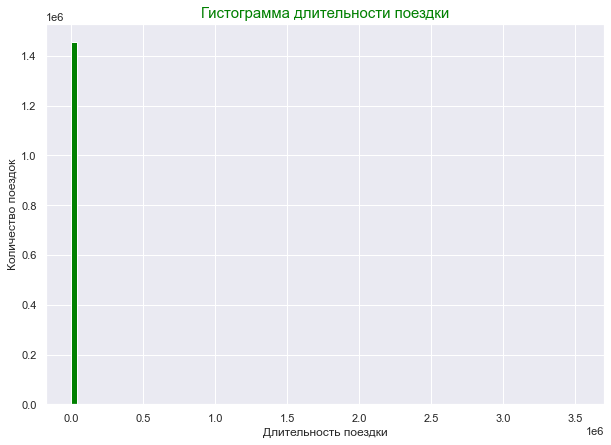

In [6]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.hist(train['trip_duration'].values, bins=100,color="green")
plt.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–µ–∑–¥–∫–∏', color = 'green', fontsize = 15)
plt.xlabel('–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø–æ–µ–∑–¥–∫–∏')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫')
plt.show()

–°–≤–µ–¥–µ–º –∑–∞–¥–∞—á—É –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ RMSLE –∫ –∑–∞–¥–∞—á–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ MSE. –ü—Ä–æ–ª–æ–≥–æ—Ä–∏—Ñ–º–∏—Ä—É–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é, —É–¥–∞–ª–∏–º –∫–æ–ª–æ–Ω–∫—É —Å–æ —Å—Ç–∞—Ä—ã–º —Ç–∞—Ä–≥–µ—Ç–æ–º.

In [7]:
#–î–æ–±–∞–±–∏–ª–∏ –∫–æ–ª–æ–Ω–∫—É –∫ –≤—ã–±–æ—Ä–∫–µ
train['log_trip_duration'] = np.log1p(train['trip_duration'].values)

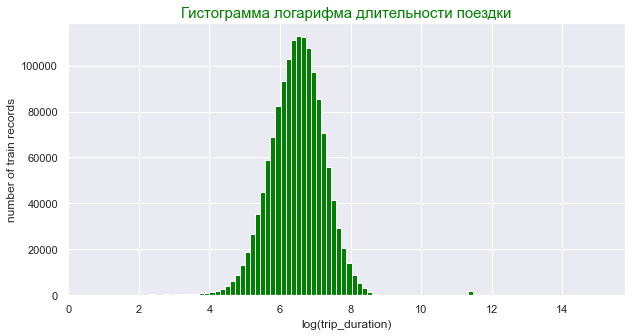

In [8]:
#–ù–∞—Ä–∏—Å—É–µ–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ —Ç–∞—Ä–≥–µ—Ç–∞ –ø–æ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
plt.rcParams['figure.figsize'] = [10, 5]
plt.hist(train['log_trip_duration'].values, bins=100, color="green")
plt.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–µ–∑–¥–∫–∏', fontsize = 15, color = 'green')
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

In [9]:
#–£–¥–∞–ª–∏–º –∫–æ–ª–æ–Ω–∫—É —Å–æ —Å—Ç–∞—Ä—ã–º —Ç–∞—Ä–≥–µ—Ç–æ–º
#train.drop('trip_duration', axis=1, inplace=True)

–ß—Ç–æ–±—ã –∏–º–µ—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—É—é —Ç–æ—á–∫—É –æ—Ç—Å—á–µ—Ç–∞, –¥–∞–≤–∞–π—Ç–µ –ø–æ—Å—á–∏—Ç–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ø—Ä–∏ –Ω–∞–∏–ª—É—á—à–µ–º –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏:

In [10]:
#–ö–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ - —Å—Ä–µ–¥–Ω–µ–µ
from sklearn import metrics
mse_const_mean = metrics.mean_squared_error(np.mean(train['log_trip_duration']) * np.ones(train.shape[0]), train['log_trip_duration'])
print(np.sqrt(mse_const_mean))

0.7957592365411504


In [11]:
#–ö–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ - –º–µ–¥–∏–∞–Ω–∞ (–≤ –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ –≤–ø–æ–ª–Ω–µ –ª–æ–≥–∏—á–Ω–æ –≤–∑—è—Ç—å –∑–∞ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É –º–µ–¥–∏–∞–Ω—É, —Å–∞–º–µ —á–∞—Å—Ç–æ–µ –≤—Ä–µ–º—è –≤ –ø—É—Ç–∏)
from sklearn import metrics
mse_const_median = metrics.mean_squared_error(np.median(train['log_trip_duration']) * np.ones(train.shape[0]), train['log_trip_duration'])
print(np.sqrt(mse_const_median))

0.7963168959485897


## –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ò–∑—É—á–∞–µ–º `pickup_datetime` 

–ü–æ—Å–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ –≤—Å–µ–≥–æ –±—ã–ª–æ –ø–æ–µ–∑–¥–æ–∫ –≤ –∫–∞–∂–¥—ã–π –∏–∑ –¥–Ω–µ–π. 

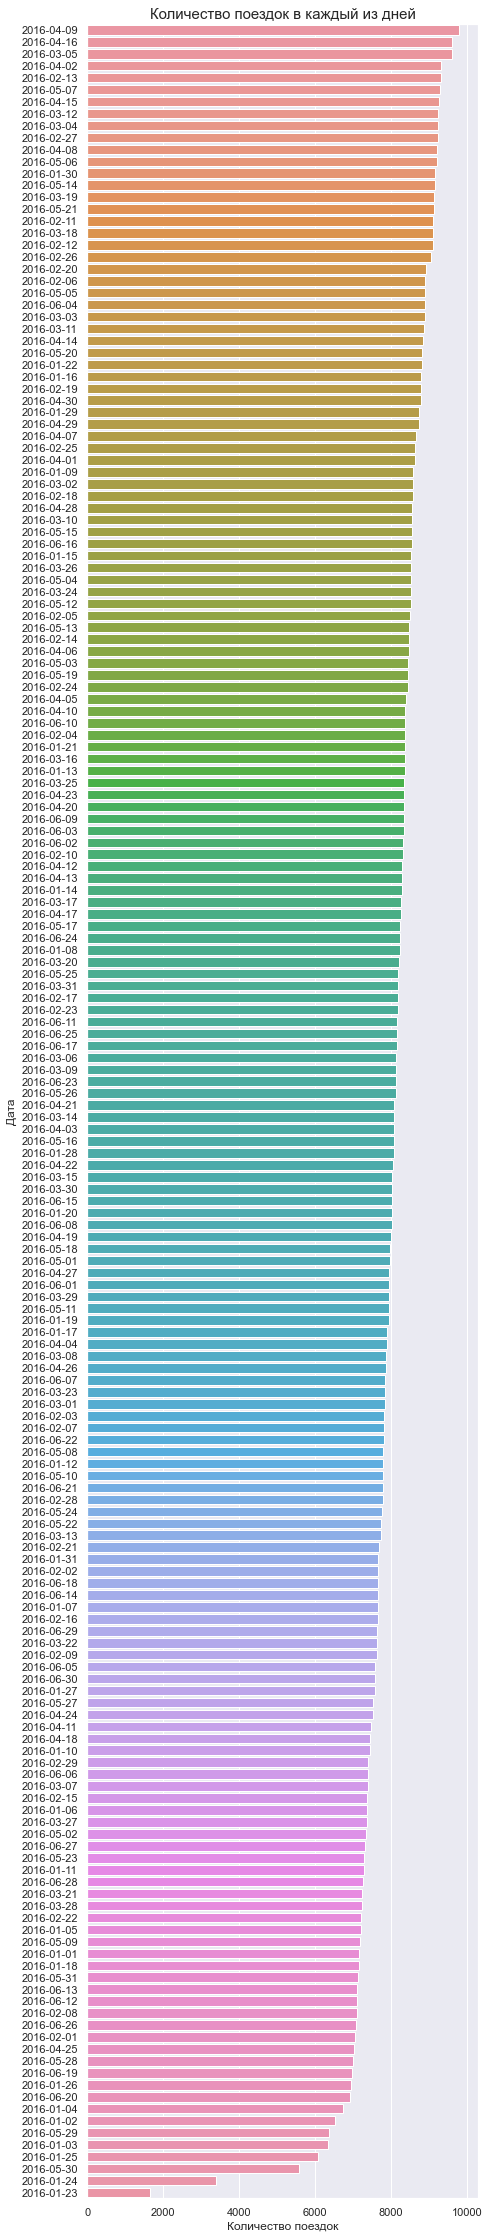

In [12]:
import matplotlib.ticker as ticker

plt.rcParams['figure.figsize'] = [7, 40]

dates = train['pickup_datetime'].dt.date
chart = sns.countplot(y = dates, data = train, order = dates.value_counts().index)

plt.title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫ –≤ –∫–∞–∂–¥—ã–π –∏–∑ –¥–Ω–µ–π', fontsize = 15)
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫')
plt.ylabel('–î–∞—Ç–∞')

plt.show()

**<span style="color:green">–í–∏–¥–∏–º, —á—Ç–æ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –µ—Å—Ç—å 2 –ø–µ—Ä–∏–æ–¥–∞, –∫–æ–≥–¥–∞ –∫–æ–ª–∏—á–µ—Å–≤—Ç–æ –ø–æ–µ–∑–¥–æ–∫ –±—ã–ª–æ –∞–Ω–æ–º–∞–ª—å–Ω–æ –Ω–∏–∑–∫–∏–º : 23 –∏ 24 —è–Ω–≤–∞—Ä—è 2016 –≥–æ–¥–∞. –í —ç—Ç–∏ –¥–∞—Ç—ã –≤ –ù—å—é-–ô–æ—Ä–∫–µ –±—ã–ª–∞ —Å–∏–ª—å–Ω–µ–π—à–∞—è —Å–Ω–µ–∂–Ω–∞—è –±—É—Ä—è –∏ –≤–ª–∞—Å—Ç–∏ –∑–∞–ø—Ä–µ—Ç–∏–ª–∏ –ø–µ—Ä–µ–¥–≤–∏–≥–∞—Ç—å—Å—è –ø–æ —É–ª–∏—Ü–∞–º –Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è—Ö, –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –∞–≤–∞—Ä–∏–π–Ω–æ-–æ–ø–∞—Å–Ω—ã—Ö —Å–∏—Ç—É–∞—Ü–∏–π </span>**

**–ü–æ—Å—Ç—Ä–æ–∏–º –ø–µ—Ä–≤—ã–π –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏**

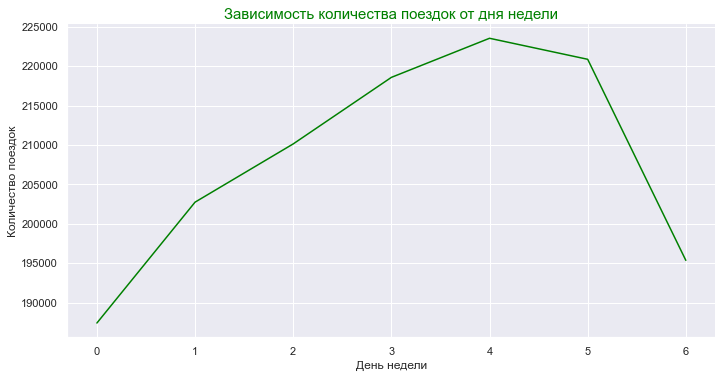

In [13]:
#–ü–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫ = 0, –≤—Ç–æ—Ä–Ω–∏–∫ = 1, ... , –≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ = 6.
day_of_week = train.groupby(train['pickup_datetime'].dt.weekday)['id'].count()

sns.relplot(data = pd.DataFrame(day_of_week), y='id', x='pickup_datetime', kind='line', height=5, aspect=2, color='green')

plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–æ–µ–∑–¥–æ–∫ –æ—Ç –¥–Ω—è –Ω–µ–¥–µ–ª–∏', color='green', fontsize = 15)
plt.xlabel('–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫')
plt.show()

**–ü–æ—Å—Ç—Ä–æ–∏–º –≤—Ç–æ—Ä–æ–π –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏**

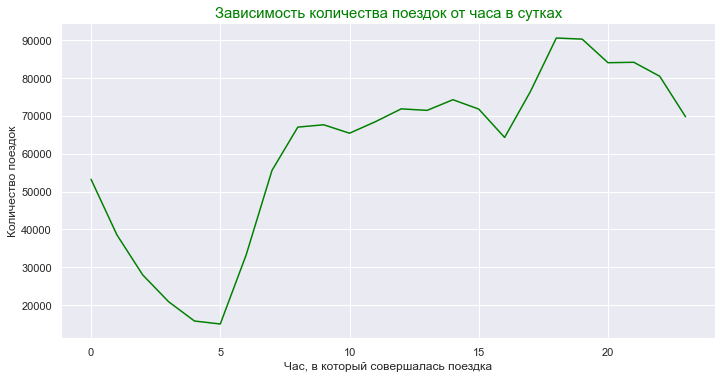

In [14]:
day_of_week = train.groupby(train['pickup_datetime'].dt.hour)['id'].count()

sns.relplot(data = pd.DataFrame(day_of_week), y='id', x='pickup_datetime', kind='line', height=5, aspect=2, color='green')

plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–æ–µ–∑–¥–æ–∫ –æ—Ç —á–∞—Å–∞ –≤ —Å—É—Ç–∫–∞—Ö', color='green', fontsize = 15)
plt.xlabel('–ß–∞—Å, –≤ –∫–æ—Ç–æ—Ä—ã–π —Å–æ–≤–µ—Ä—à–∞–ª–∞—Å—å –ø–æ–µ–∑–¥–∫–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫')
plt.show()

**–ù–∞—Ä–∏—Å—É–µ–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–æ–µ–∑–¥–æ–∫ –æ—Ç —á–∞—Å–∞ –≤ —Å—É—Ç–∫–∞—Ö –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –º–µ—Å—è—Ü–µ–≤**

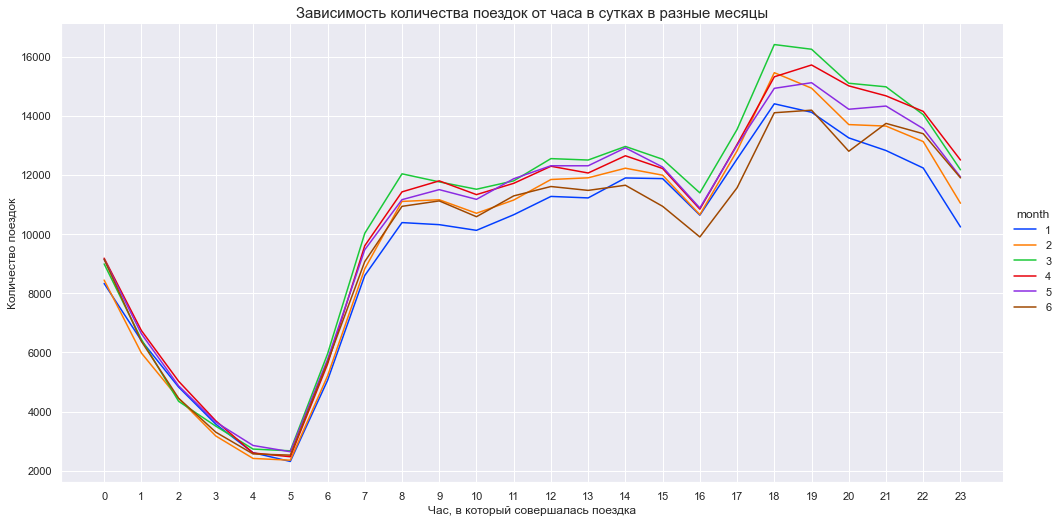

In [15]:
#The month as January=1, December=12.
months_hours = pd.DataFrame(train.groupby([train['pickup_datetime'].dt.month, train['pickup_datetime'].dt.hour])['id'].count())
months_hours.index = months_hours.index.rename(['month', 'hours'])

months_hours.reset_index(inplace=True)

sns.relplot(data=months_hours, y='id', x='hours', kind='line', hue='month', height=7, aspect=2, palette="bright")
plt.xticks(range(24))


plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–æ–µ–∑–¥–æ–∫ –æ—Ç —á–∞—Å–∞ –≤ —Å—É—Ç–∫–∞—Ö –≤ —Ä–∞–∑–Ω—ã–µ –º–µ—Å—è—Ü—ã', fontsize = 15)
plt.xlabel('–ß–∞—Å, –≤ –∫–æ—Ç–æ—Ä—ã–π —Å–æ–≤–µ—Ä—à–∞–ª–∞—Å—å –ø–æ–µ–∑–¥–∫–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫')
plt.show()

**–ù–∞—Ä–∏—Å—É–µ–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–æ–µ–∑–¥–æ–∫ –æ—Ç —á–∞—Å–∞ –≤ —Å—É—Ç–∫–∞—Ö –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –¥–Ω–µ–π –Ω–µ–¥–µ–ª–∏**

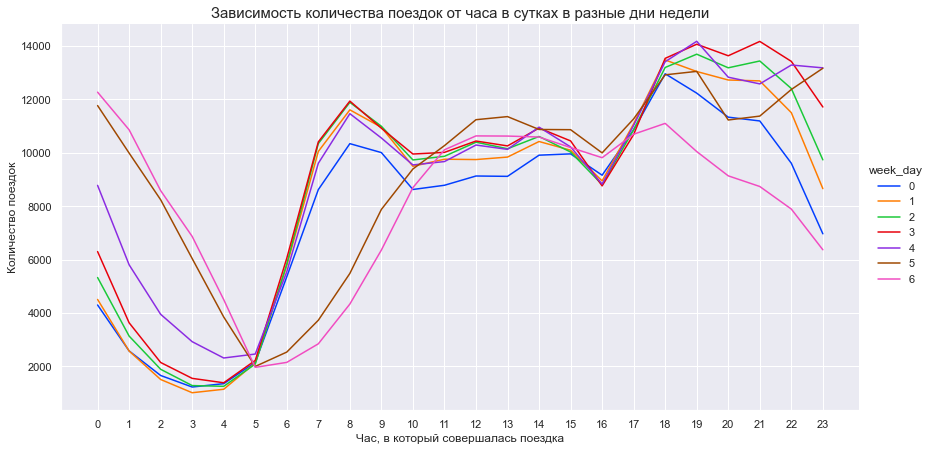

In [16]:
#–ü–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫ = 0, –≤—Ç–æ—Ä–Ω–∏–∫ = 1, ... , –≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ = 6.
months_hours = pd.DataFrame(train.groupby([train['pickup_datetime'].dt.weekday,train['pickup_datetime'].dt.hour])['id'].count())
months_hours.index = months_hours.index.rename(['week_day', 'hours'])

months_hours.reset_index(inplace=True)

sns.relplot(data=months_hours, y='id', x='hours', kind='line', hue='week_day', height=6, aspect=2, palette="bright")
plt.xticks(range(24))


plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–æ–µ–∑–¥–æ–∫ –æ—Ç —á–∞—Å–∞ –≤ —Å—É—Ç–∫–∞—Ö –≤ —Ä–∞–∑–Ω—ã–µ –¥–Ω–∏ –Ω–µ–¥–µ–ª–∏', fontsize = 15)
plt.xlabel('–ß–∞—Å, –≤ –∫–æ—Ç–æ—Ä—ã–π —Å–æ–≤–µ—Ä—à–∞–ª–∞—Å—å –ø–æ–µ–∑–¥–∫–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫')
plt.show()

**<span style="color:green">–î–Ω–∏ –Ω–µ–¥–µ–ª–∏:</span>** <span style="color:green">–Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ "–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–æ–µ–∑–¥–æ–∫ –æ—Ç —á–∞—Å–∞ –≤ —Å—É—Ç–∫–∞—Ö –≤ —Ä–∞–∑–Ω—ã–µ –¥–Ω–∏ –Ω–µ–¥–µ–ª–∏" –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —Å—É–±–±–æ—Ç—É –∏ –≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –¥–Ω–µ–π. –í–∏–¥–∏–º, —á—Ç–æ —Å–æ–≤–µ—Ä—à–∞–ª–æ—Å—å –Ω–∞–º–Ω–æ–≥–æ –º–µ–Ω—å—à–µ –ø–æ–µ–∑–¥–æ–∫ —Å 6 –¥–æ 9 —É—Ç—Ä–∞, –∫–∞–∂–µ—Ç—Å—è, —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –ª—é–¥–∏ –Ω–µ —Ç–æ—Ä–æ–ø–∏–ª–∏—Å—å –Ω–∞ –≤—ã—Ö–æ–¥–Ω—ã—Ö –Ω–∞ —Ä–∞–±–æ—Ç—É. –¢–∞–∫–∂–µ –≤–∏–¥–∏–º, —á—Ç–æ –≤ –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫ –ø–æ–µ–∑–¥–æ–∫ –∫–∞–∫-—Ç–æ –ø–æ–º–µ–Ω—å—à–µ, —á–µ–º –≤ –¥—Ä—É–≥–∏–µ –¥–Ω–∏, –≤–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –Ω–µ–¥–µ–ª—è —Ç–æ–ª—å–∫–æ –Ω–∞—á–∞–ª–∞—Å—å –∏ –ª—é–¥–∏ –µ—â–µ –Ω–µ –ø–æ–≥—Ä—É–∑–∏–ª–∏—Å—å –≤ —Ä–∞–±–æ—Ç—É, –ø–æ—ç—Ç–æ–º—É –Ω–µ –µ–∑–¥–∏–ª–∏ –Ω–∞ –≤—Å—Ç—Ä–µ—á–∏. –¢–∞–∫–∂–µ –º–æ–∂–Ω–æ —É–≤–∏–¥–µ—Ç—å, —á—Ç–æ –≤ —á–µ—Ç–≤–µ—Ä–≥ (–∫—Ä–∞—Å–Ω–∞—è –ª–∏–Ω–∏—è) –ø–æ–µ–∑–¥–æ–∫ –±—ã–ª–æ –±–æ–ª—å—à–µ, —á–µ–º –≤ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –¥–Ω–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ –≤–µ—á–µ—Ä–Ω–µ–µ –≤—Ä–µ–º—è.</span>
    
**<span style="color:green"> –ú–µ—Å—è—Ü–∞:</span>** <span style="color:green"> –í—ã–¥–µ–ª–∏–ª—Å—è –º–∞—Ä—Ç (–∑–µ–ª–µ–Ω—ã–π —Ü–≤–µ—Ç), –ª—é–¥–∏ —Å–æ–≤–µ—Ä—à–∞–ª–∏ –±–æ–ª—å—à–µ –ø–æ–µ–∑–¥–æ–∫ –≤ —ç—Ç–æ—Ç –º–µ—Å—è—Ü –≤–æ–∑–º–æ–∂–Ω–æ –∏–∑-–∑–∞ –ø—Ä–∞–∑–¥–Ω–∏–∫–∞, –∞ –≤–æ–∑–º–æ–∂–Ω–æ –ø–æ—Ç–æ–º—É —á—Ç–æ –ø—Ä–∏—à–ª–∞ –≤–µ—Å–Ω–∞, –∏ —Å—Ç–∞–ª–æ —Ç–µ–ø–ª–µ–µ (–∑–∞—Ö–æ—Ç–µ–ª–æ—Å—å –ø–æ–µ—Ö–∞—Ç—å –ø–æ–≥—É–ª—è—Ç—å).</span>
    
**<span style="color:green">–í—Ä–µ–º—è —Å—É—Ç–æ–∫:</span>** <span style="color:green">–í–∏–¥–∏–º, —á—Ç–æ –º–µ–Ω—å—à–µ –≤—Å–µ–≥–æ –ø–æ–µ–∑–¥–æ–∫ –ª—é–¥–∏ —Å–æ–≤–µ—Ä—à–∞–ª–∏ —Å 1 –¥–æ 5 —É—Ç—Ä–∞, —Ç–∞–∫ –∫–∞–∫ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —Å–ø–∞–ª–∏. –ó–∞—Ç–µ–º —Å 6 –¥–æ 8 —É—Ç—Ä–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫ —Å–∏–ª—å–Ω–æ –≤–æ–∑—Ä–∞—Å—Ç–∞–µ—Ç, —Ç–∞–∫ –∫–∞–∫ –ª—é–¥–∏ —Ç–æ—Ä–æ–ø–∏–ª–∏—Å—å –Ω–∞ —Ä–∞–±–æ—Ç—É. –ü–æ—Ç–æ–º 9 –¥–æ 16 —á–∞—Å–æ–≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫ —Å–ª–∞–±–æ –∫–æ–ª–µ–±–∞–ª–æ—Å—å, —Ç–∞–∫ –∫–∞–∫ –ª—é–¥–∏ —Ä–∞–±–æ—Ç–∞–ª–∏ –∏ –ø–æ–ª—å–∑–æ–≤–∞–ª–∏—Å—å —Ç–∞–∫—Å–∏ –Ω–µ –æ—á–µ–Ω—å –∞–∫—Ç–∏–≤–Ω–æ. –ù–æ –ø–æ—Å–ª–µ 17 —á–∞—Å–æ–≤ —Å–ø—Ä–æ—Å –Ω–∞ –ø–æ–µ–∑–¥–∫–∏ –Ω–∞ —Ç–∞–∫—Å–∏ —Ä–µ–∑–∫–æ –≤–æ–∑—Ä–∞—Å—Ç–∞–µ—Ç, —Ç–∞–∫ –∫–∞–∫ –ª—é–¥–∏ —Ç–æ—Ä–æ–ø–∏–ª–∏—Å—å –¥–æ–º–æ–π —Å —Ä–∞–±–æ—Ç—ã. –ò –∫ –≤–µ—á–µ—Ä—É —Å–ø—Ä–æ—Å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ —Å–Ω–∏–∂–∞–ª—Å—è.</span>

**–†–∞–∑–æ–±—å–µ–º –∏—Å—Ö–æ–¥–Ω—É—é –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ 7:3**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_4, test = train_test_split(train, test_size = 0.3, random_state = 1)

**–ü–æ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ –Ω–∞—Ä–∏—Å—É–µ–º –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–µ–≥–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–∫–∏ –æ—Ç –¥–Ω—è –Ω–µ–¥–µ–ª–∏**

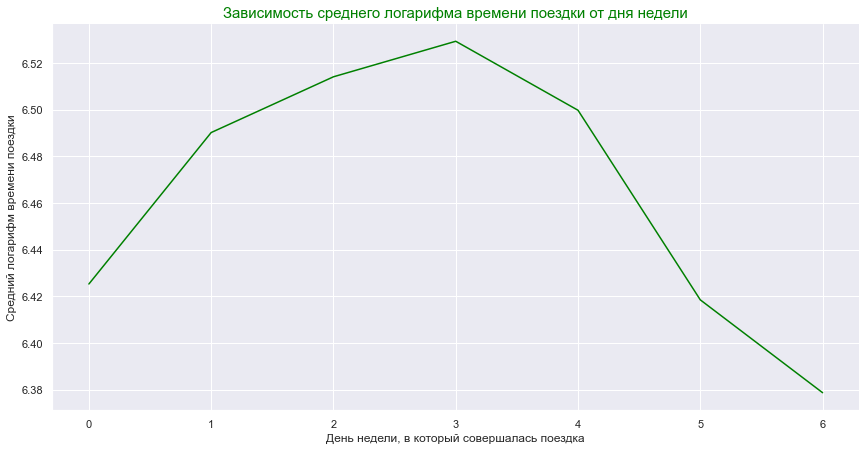

In [19]:
duration_weekday = pd.DataFrame(train_4.groupby(train_4['pickup_datetime'].dt.weekday)['log_trip_duration'].mean())
duration_weekday.reset_index(inplace=True)

sns.relplot(data=duration_weekday, y='log_trip_duration', x='pickup_datetime', kind='line', height=6, aspect=2, color='green')

plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–≥–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–∫–∏ –æ—Ç –¥–Ω—è –Ω–µ–¥–µ–ª–∏', color='green', fontsize = 15)
plt.xlabel('–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏, –≤ –∫–æ—Ç–æ—Ä—ã–π —Å–æ–≤–µ—Ä—à–∞–ª–∞—Å—å –ø–æ–µ–∑–¥–∫–∞')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–π –ª–æ–≥–∞—Ä–∏—Ñ–º –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–∫–∏')
plt.show()

**–ü–æ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ –Ω–∞—Ä–∏—Å—É–µ–º –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–µ–≥–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–∫–∏ –æ—Ç —á–∞—Å–∞ –≤ —Å—É—Ç–∫–∞—Ö**

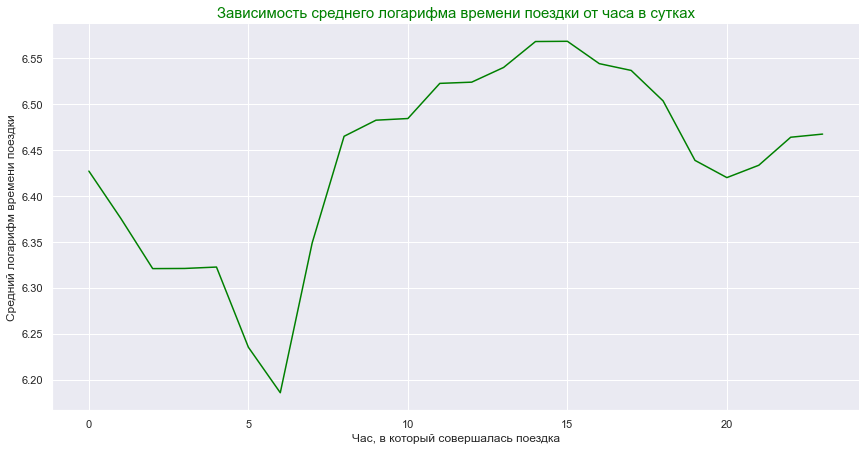

In [20]:
duration_hour = pd.DataFrame(train_4.groupby(train_4['pickup_datetime'].dt.hour)['log_trip_duration'].mean())
duration_hour.reset_index(inplace=True)

sns.relplot(data=duration_hour, y='log_trip_duration', x='pickup_datetime', kind='line', height=6, aspect=2, color='green')

plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–≥–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–∫–∏ –æ—Ç —á–∞—Å–∞ –≤ —Å—É—Ç–∫–∞—Ö', color='green', fontsize = 15)
plt.xlabel('–ß–∞—Å, –≤ –∫–æ—Ç–æ—Ä—ã–π —Å–æ–≤–µ—Ä—à–∞–ª–∞—Å—å –ø–æ–µ–∑–¥–∫–∞')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–π –ª–æ–≥–∞—Ä–∏—Ñ–º –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–∫–∏')
plt.show()

**–ü–æ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ –Ω–∞—Ä–∏—Å—É–µ–º –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–µ–≥–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–∫–∏ –æ—Ç –¥–Ω—è –≤ –≥–æ–¥—É**

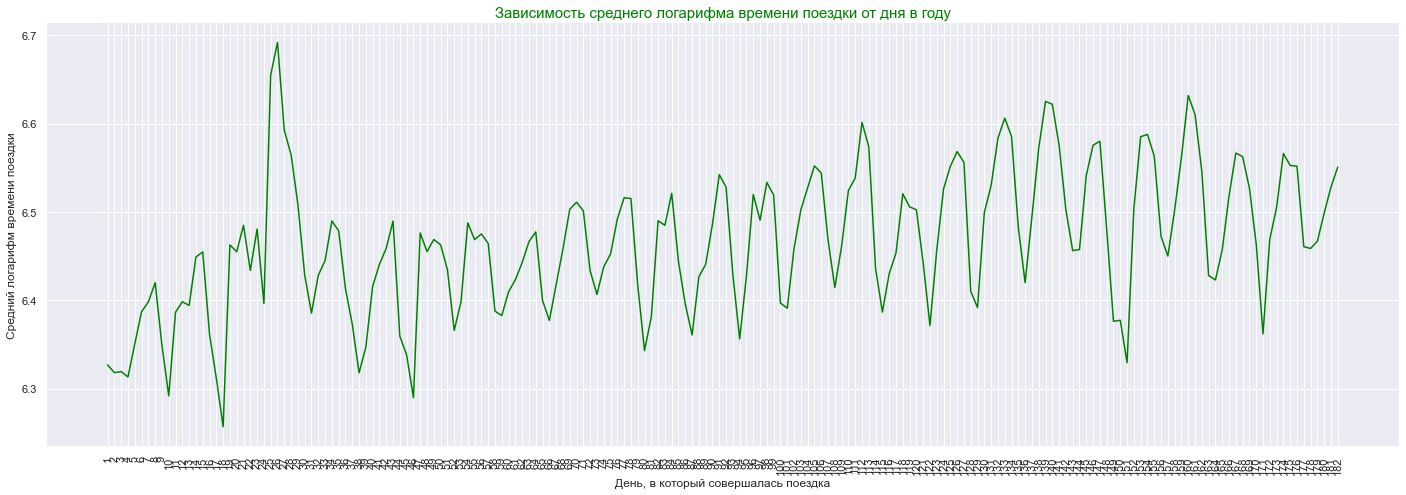

In [21]:
duration_dayofyear = pd.DataFrame(train_4.groupby(train_4['pickup_datetime'].dt.dayofyear)['log_trip_duration'].mean())
duration_dayofyear.reset_index(inplace=True)

sns.relplot(data=duration_dayofyear, y='log_trip_duration', x='pickup_datetime', kind='line', height=6.5, aspect=3, color='green')

plt.xticks(range(1, duration_dayofyear.shape[0] + 1), rotation='vertical')

plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–≥–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–∫–∏ –æ—Ç –¥–Ω—è –≤ –≥–æ–¥—É', color='green', fontsize = 15)
plt.xlabel('–î–µ–Ω—å, –≤ –∫–æ—Ç–æ—Ä—ã–π —Å–æ–≤–µ—Ä—à–∞–ª–∞—Å—å –ø–æ–µ–∑–¥–∫–∞')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–π –ª–æ–≥–∞—Ä–∏—Ñ–º –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–∫–∏')
plt.show()

**<span style="color:green">–ü–µ—Ä–≤–æ–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ:</span>**<span style="color:green"> –ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤ —á–µ—Ç–≤–µ—Ä–≥ (3–π –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏) –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø–æ–µ–∑–¥–æ–∫ –±—ã–ª–∞ –≤—ã—à–µ, —á–µ–º –≤ –¥—Ä—É–≥–∏–µ –¥–Ω–∏. –ö–∞–∂–µ—Ç—Å—è, —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –Ω–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –≥—Ä–∞—Ñ–∏–∫–∞—Ö –º—ã –≤—ã–¥–µ–ª–∏–ª–∏ —á–µ—Ç–≤–µ—Ä–≥, –∫–∞–∫ —Å–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –¥–µ–Ω—å –¥–ª—è –ø–æ–µ–∑–¥–æ–∫, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω–Ω–æ—Å—Ç—å –¥–æ—Ä–æ–≥ –±—ã–ª–∞ –≤—ã—à–µ, –∏ –∑–Ω–∞—á–∏—Ç –ø–æ–µ–∑–¥–∫–∞ –º–æ–≥–ª–∞ –ø—Ä–æ–¥–ª–∏—Ç—å—Å—è –¥–æ–ª—å—à–µ –æ–±—ã—á–Ω–æ–≥–æ. –ê–Ω–∞–ª–æ–≥–∏—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –∏ –ø—Ä–æ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –¥–Ω–∏ –Ω–µ–¥–µ–ª–∏: —á–µ–º –≤—ã—à–µ —Å–ø—Ä–æ—Å –Ω–∞ –ø–æ–µ–∑–¥–∫–∏, —Ç–µ–º –ø–æ–µ–∑–¥–∫–∞ –¥–ª–∏–Ω–Ω–µ–µ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ (–∏–∑-–∑–∞ –ø—Ä–æ–±–æ–∫, –≤—ã—Å–æ–∫–æ–π –∑–∞–≥—Ä—É–∂–µ–Ω–Ω–æ—Å—Ç–∏ –Ω–∞ –¥–æ—Ä–æ–≥–∞—Ö).</span>
    
**<span style="color:green">–í—Ç–æ—Ä–æ–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ:</span>**<span style="color:green"> –¢–∞–∫–∂–µ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –ø–æ—Ö–æ–∂–∞—è —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è –æ—Ç—Ä–∞–∂–∞–µ—Ç—Å—è –∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —á–∞—Å–æ–≤ –≤ —Å—É—Ç–∫–∞—Ö. –ì—Ä–∞—Ñ–∏–∫–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ç–∞—Ä–≥–µ—Ç–∞ –æ—Ç —á–∞—Å–∞ –≤ —Å—É—Ç–∫–∞—Ö –∏ –≥—Ä–∞—Ñ–∏–∫–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–µ–≥–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–∫–∏ –æ—Ç —á–∞—Å–∞ –≤ —Å—É—Ç–∫–∞—Ö –ø–æ—Ö–æ–∂–∏, —Å–≤—è–∑—å –∞–Ω–∞–ª–æ–≥–∏—á–Ω–∞—è: –≤ –ø–æ–ø—É–ª—è—Ä–Ω–æ–µ –≤—Ä–µ–º—è –∑–∞–∫–∞–∑–∞ —Ç–∞–∫—Å–∏, –¥–æ—Ä–æ–≥–∏ –±–æ–ª–µ–µ –∑–∞–≥—Ä—É–∂–µ–Ω—ã, –ø–æ–∑–¥–∫–∞ –¥–ª–∏–ª–∞—Å—å –¥–æ–ª—å—à–µ. </span>
    
**<span style="color:green">–¢—Ä–µ–Ω–¥ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ log_trip_duration –æ—Ç –Ω–æ–º–µ—Ä–∞ –¥–Ω—è –≤ –≥–æ–¥—É:</span>** <span style="color:green">–ü–µ—Ä–≤–æ–µ, —á—Ç–æ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å: 23 –∏ 24 —è–Ω–≤–∞—Ä—è –ø–æ–µ–∑–¥–∫–∏ –∑–∞–Ω–∏–º–∞–ª–∏ –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥—Ä—É–≥–∏—Ö –≤—ã—Ö–æ–¥–Ω—ã—Ö –¥–Ω–µ–π. –ë–æ–ª–µ–µ —Ç–æ–≥–æ, –Ω–µ–¥–µ–ª—é –ø–æ—Å–ª–µ —Å–Ω–µ–∂–Ω–æ–π –±—É—Ä–∏ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø–æ–µ–∑–¥–æ–∫ —Ä–µ–∑–∫–æ –≤–æ–∑—Ä–æ—Å–ª–∞, —á–µ–º –≤ –¥—Ä—É–≥–∏–µ –¥–Ω–∏ –≤ –≥–æ–¥—É. –Ø –¥—É–º–∞—é, —ç—Ç–æ –±—ã–ª–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –¥–æ—Ä–æ–≥–∏ –±—ã–ª–∏ –≤ —Å–Ω–µ–≥—É, –∏—Ö —á–∏—Å—Ç–∏–ª–∏, —Å–æ–∑–¥–∞–≤–∞–ª–∏—Å—å –ø—Ä–æ–±–∫–∏ –Ω–∞ –¥–æ—Ä–æ–≥–∞—Ö. –í—Ç–æ—Ä–æ–π, –∞–Ω–æ–º–∞–ª—å–Ω—ã–π –∫—É—Å–æ—á–µ–∫ - —ç—Ç–æ 151 –¥–µ–Ω—å –≤ –≥–æ–¥—É (30 –º–∞—è, —Ç–∞–∫ –∫–∞–∫ 2016 –≥–æ–¥ –≤–∏—Å–æ–∫–æ—Å–Ω—ã–π), —ç—Ç–æ –±—ã–ª –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫, –≤ –ù—å—é-–ô–æ—Ä–∫–µ –æ—Ç–º–µ—á–∞–ª—Å—è "–î–µ–Ω—å –ø–æ–º–∏–Ω–æ–≤–µ–Ω–∏—è". –í–∏–¥–∏–º, —á—Ç–æ –≤ —ç—Ç–æ—Ç –¥–µ–Ω—å –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Ä–µ–∑–∫–æ–µ —Å–Ω–∏–∂–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–æ–∫, –∫–∞–∂–µ—Ç—Å—è, —ç—Ç–æ –±—ã–ª–æ –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –º–Ω–æ–≥–∏–µ –ª—é–¥–∏ –Ω–µ –ø–æ—à–ª–∏ –Ω–∞ —Ä–∞–±–æ—Ç—É –∏ –æ—Å—Ç–∞–ª–∏—Å—å –¥–æ–º–∞. –¢–∞–∫ –∫–∞–∫ –Ω–∞ —Å–ª–µ–¥—É—â–∏–µ —Å—É—Ç–∫–∏ –≥—Ä–∞—Ñ–∏–∫ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–∑–¥–∫–∏ —Å–Ω–æ–≤–∞ —Å—Ç–∞–ª —Ç–∏–ø–∏—á–Ω—ã–º. </span>

–î–æ–±–∞–≤–∏–º —Å–ª–µ–¥—É—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ `pickup_datetime`:
1. –î–µ–Ω—å –Ω–µ–¥–µ–ª–∏
2. –ú–µ—Å—è—Ü
3. –ß–∞—Å
4. –Ø–≤–ª—è–µ—Ç—Å—è –ª–∏ –ø–µ—Ä–∏–æ–¥ –∞–Ω–æ–º–∞–ª—å–Ω—ã–º (–¥–≤–∞ –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –¥–≤—É–º –∞–Ω–æ–º–∞–ª—å–Ω—ã–º –ø–µ—Ä–∏–æ–¥–∞–º)
5. –ù–æ–º–µ—Ä –¥–Ω—è –≤ –≥–æ–¥—É

**–î–æ–±–∞–≤–∏–º —ç—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É —Å–æ–æ—Ç–≤–µ—Ç—Å–≤–µ–Ω–Ω–æ**

In [22]:
pd.options.mode.chained_assignment = None  # default='warn'

In [23]:
#–¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏
train_4['weekday'] = train_4['pickup_datetime'].dt.weekday
test['weekday'] = test['pickup_datetime'].dt.weekday

#–º–µ—Å—è—Ü
train_4['month'] = train_4['pickup_datetime'].dt.month
test['month'] = test['pickup_datetime'].dt.month

#—á–∞—Å
train_4['hour'] = train_4['pickup_datetime'].dt.hour
test['hour'] = test['pickup_datetime'].dt.hour

#–Ω–æ–º–µ—Ä –¥–Ω—è –≤ –≥–æ–¥—É
train_4['day_of_year'] = train_4['pickup_datetime'].dt.dayofyear
test['day_of_year'] = test['pickup_datetime'].dt.dayofyear

#–∞–Ω–æ–º–∞–ª—å–Ω—ã–π –ø–µ—Ä–∏–æ–¥
train_4['is_snowstorm'] = ((train_4['day_of_year'] == 23) | (train_4['day_of_year'] == 24)).apply(lambda x: 1 if x else 0)
train_4['is_memorial'] = (train_4['day_of_year'] == 151).apply(lambda x: 1 if x else 0)

test['is_snowstorm'] = ((test['day_of_year'] == 23) | (test['day_of_year'] == 24)).apply(lambda x: 1 if x else 0)
test['is_memorial'] = (test['day_of_year'] == 151).apply(lambda x: 1 if x else 0)

–ò—Ç–∞–∫, –º—ã —É–∂–µ —Å–æ–∑–¥–∞–ª–∏ –Ω–µ–∫–æ—Ç–æ—Ä–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

–û–ø—Ä–µ–¥–µ–ª–∏–º —Ç–∏–ø—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

**<span style="color:green">–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ:</span>** <span style="color:green"> –ü—Ä–∏–∑–Ω–∞–∫–∏, –æ–ø–∏—Å—ã–≤–∞—é—â–∏–µ –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ —Å–æ–±—ã—Ç–∏—è, —Å–¥–µ–ª–∞–µ–º –∫–∞—Ç–µ–≥–∏—Ä–∏–∞–ª—å–Ω—ã–º–∏, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ –∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –¢–æ–∂–µ –∫–∞—Å–∞–µ—Ç—Å—è –¥–Ω–µ–π –Ω–µ–¥–µ–ª–∏ –∏ —á–∞—Å–æ–≤ –≤ —Å—É—Ç–∫–∞—Ö.</span>

**<span style="color:green">–ß–∏—Å–ª–µ–Ω–Ω—ã–µ: </span>** <span style="color:green"> –ù–æ–º–µ—Ä –¥–Ω—è –≤ –≥–æ–¥—É. –î—É–º–∞—é, —á—Ç–æ –≤–≤–æ–¥–∏—Ç—å 180 –Ω–æ–≤—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π –Ω–µ –∏–º–µ–µ—Ç —Å–º—ã—Å–ª–∞. –ò –µ—â–µ, –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç –ø–æ–¥—Å—Ç—Ä–æ–∏—Ç—å—Å—è –∏–º–µ–Ω–Ω–æ –ø–æ–¥ –¥–Ω–∏ –∏–∑ 2016 –≥–æ–¥–∞, –∞ –Ω–∞ –¥—Ä—É–≥–∏—Ö –¥–Ω—è—Ö –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–µ —Å–æ–≤—Å–µ–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ. –¢–∞–∫–∂–µ, –º–Ω–µ –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –µ—Å—Ç—å —Ç—Ä–µ–Ω–¥ –Ω–∞ —Ç–æ, —á—Ç–æ —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –¥–Ω—è –≥–æ–¥–∞ —Ä–∞—Å—Ç–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –ø–æ–µ–∑–¥–∫–∏, —ç—Ç–æ –∑–∞–º–µ—Ç–Ω–æ –∏–∑ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞. –ü–æ—ç—Ç–æ–º—É –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø—Ä–∏—Å—É—Ç—Å–≤—É–µ—Ç.</span>

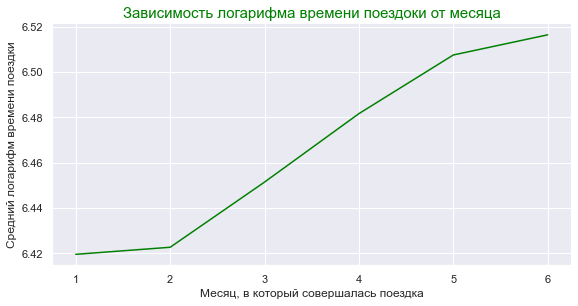

In [24]:
duration_month = pd.DataFrame(train_4.groupby(train_4['pickup_datetime'].dt.month)['log_trip_duration'].mean())
duration_month.reset_index(inplace=True)

sns.relplot(data=duration_month, y='log_trip_duration', x='pickup_datetime', kind='line',height=4, aspect=2, color='green')

plt.xticks(range(1, duration_month .shape[0] + 1))

plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–æ–∫–∏ –æ—Ç –º–µ—Å—è—Ü–∞', color = 'green', fontsize = 15 )
plt.xlabel('–ú–µ—Å—è—Ü, –≤ –∫–æ—Ç–æ—Ä—ã–π —Å–æ–≤–µ—Ä—à–∞–ª–∞—Å—å –ø–æ–µ–∑–¥–∫–∞')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–π –ª–æ–≥–∞—Ä–∏—Ñ–º –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–∫–∏')
plt.show()

<span style="color:green"> –ü–æ—á—Ç–∏ –ø—Ä–∏—Å—É—Ç–≤—É–µ—Ç) </span>

**–û–±—É—á–∏–º `Ridge`-—Ä–µ–≥—Ä–µ—Å—Å–∏—é —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é, –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–≤ –≤—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ–º–æ—â—å—é `OneHotEncoder`. –ß–∏—Å–ª–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º —Å –ø–æ–º–æ—â—å—é `StandardScaler`**

### –ü—Ä–∏—Å—Ç—É–ø–∏–º –∫ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

**–ó–∞–∫–æ–¥–∏—Ä—É–µ–º –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É**

üõë–ò—Å–ø–æ–ª—å–∑–µ–º —Ç–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –≤—ã–¥–µ–ª–∏–ª–∏ –ø—Ä–µ–¥—ã–¥—É—â–µ–π —á–∞—Å—Ç–∏ –∑–∞–¥–∞–Ω–∏—èüõë

In [26]:
#–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ
ohe = OneHotEncoder()

catogorical_train = train_4[['is_snowstorm', 'is_memorial']].reset_index().drop('index', axis=1) #–±–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –Ω–µ –∏–∑–º–µ–Ω—è–µ–º,
                                                                                               #–æ—á–∏—Å—Ç–∏–º —Ç–æ–ª—å–∫–æ –∏–Ω–¥–µ–∫—Å—ã 
#–∫–æ–¥–∏—Ä—É–µ–º –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏. –ü–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫=0,..., –≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ = 6. 
ohe_weekday = pd.DataFrame(ohe.fit_transform(train_4[['weekday']]).toarray())
ohe_weekday.columns = map(lambda x: 'weekday_' + str(x + 1),list(ohe_weekday.columns))   #–Ω–∞–∑–≤–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –≤–∏–¥–∞ weekday_i

#–∫–æ–¥–∏—Ä—É–µ–º —á–∞—Å—ã –≤ —Å—É—Ç–∫–∞—Ö. 
ohe_hours = pd.DataFrame(ohe.fit_transform(train_4[['hour']]).toarray())
ohe_hours.columns = map(lambda x: 'hour_' + str(x),list(ohe_hours.columns))              #–Ω–∞–∑–≤–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –≤–∏–¥–∞ hour_i

#—Å–æ–µ–¥–∏–Ω—è–µ–º —Ç–æ, —á—Ç–æ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–ª–∏ –≤–º–µ—Å—Ç–µ
catogorical_train = catogorical_train.join(ohe_weekday)
catogorical_train = catogorical_train.join(ohe_hours)


#–ß–∏—Å–ª–µ–Ω–Ω—ã–µ
scaler = StandardScaler()
scaler = pd.DataFrame(scaler.fit_transform(train_4[['day_of_year', 'month']]))
scaler.columns = ['day_of_year', 'month']                                      

catogorical_train = catogorical_train.join(scaler)

y_train = train_4['log_trip_duration'] #—Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è 

–ü—Ä–∏–∫–∏–Ω–µ–º, —Å–∫–æ–ª—å–∫–æ —É –Ω–∞—Å –¥–æ–ª–∂–Ω–æ –±—ã–ª–æ –ø–æ–ª—É—á–∏—Ç—å—Å—è —Å—Ç–æ–ª–±—Ü–æ–≤ –≤ catogorical_train (–æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞).

'is_snowstorm' –∏  'is_memorial' –¥–∞–ª–∏ 2 —Å—Ç–æ–ª–±—Ü–∞.

ohe_weekday –µ—â–µ 7 —Å—Ç–æ–ª–±—Ü–æ–≤.

ohe_hours –ø–ª—é—Å 24  —Å—Ç–æ–ª–±—Ü–∞.

'day_of_year', 'month' –µ—â–µ 2 —Å—Ç–æ–ª–±—Ü–∞.

**–ò–¢–û–ì–û: 2+7+24+2=35 —Å—Ç–æ–ª–±—Ü–æ–≤**



In [27]:
#–í–µ—Ä–Ω–æ
catogorical_train.shape[1]

35

**–ó–∞–∫–æ–¥–∏—Ä—É–µ–º —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É**

In [28]:
#–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ
ohe = OneHotEncoder()

catogorical_test = test[['is_snowstorm', 'is_memorial']].reset_index().drop('index', axis=1) #–±–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –Ω–µ –∏–∑–º–µ–Ω—è–µ–º,
                                                                                             #–æ—á–∏—Å—Ç–∏–º —Ç–æ–ª—å–∫–æ –∏–Ω–¥–µ–∫—Å—ã 
#–∫–æ–¥–∏—Ä—É–µ–º –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏. –ü–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫=0,..., –≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ = 6. 
ohe_weekday = pd.DataFrame(ohe.fit_transform(test[['weekday']]).toarray())
ohe_weekday.columns = map(lambda x: 'weekday_' + str(x + 1),list(ohe_weekday.columns))   #–Ω–∞–∑–≤–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –≤–∏–¥–∞ weekday_i

#–∫–æ–¥–∏—Ä—É–µ–º —á–∞—Å—ã –≤ —Å—É—Ç–∫–∞—Ö. 
ohe_hours = pd.DataFrame(ohe.fit_transform(test[['hour']]).toarray())
ohe_hours.columns = map(lambda x: 'hour_' + str(x),list(ohe_hours.columns))              #–Ω–∞–∑–≤–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –≤–∏–¥–∞ hour_i

#—Å–æ–µ–¥–∏–Ω—è–µ–º —Ç–æ, —á—Ç–æ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–ª–∏ –≤–º–µ—Å—Ç–µ
catogorical_test = catogorical_test.join(ohe_weekday)
catogorical_test = catogorical_test.join(ohe_hours)


#–ß–∏—Å–ª–µ–Ω–Ω—ã–µ
scaler = StandardScaler()
scaler = pd.DataFrame(scaler.fit_transform(test[['day_of_year', 'month']]))
scaler.columns = ['day_of_year', 'month']                                      

catogorical_test = catogorical_test.join(scaler)

y_test = test['log_trip_duration'] #—Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è 

In [29]:
catogorical_test.head()

is_snowstorm  is_memorial  weekday_1  weekday_2  weekday_3  weekday_4  \
0             0            0        0.0        0.0        0.0        0.0   
1             0            0        0.0        0.0        0.0        0.0   
2             0            0        0.0        0.0        0.0        0.0   
3             0            1        1.0        0.0        0.0        0.0   
4             0            0        0.0        1.0        0.0        0.0   

   weekday_5  weekday_6  weekday_7  hour_0  ...  hour_16  hour_17  hour_18  \
0        0.0        1.0        0.0     0.0  ...      0.0      0.0      0.0   
1        0.0        1.0        0.0     0.0  ...      0.0      0.0      0.0   
2        1.0        0.0        0.0     0.0  ...      0.0      1.0      0.0   
3        0.0        0.0        0.0     0.0  ...      0.0      0.0      0.0   
4        0.0        0.0        0.0     0.0  ...      0.0      0.0      0.0   

   hour_19  hour_20  hour_21  hour_22  hour_23  day_of_year     month  
0      0.0      1.0      0.0      0.0      0.0    -0.654857 -0.901634  
1      0.0      0.0      0.0      0.0      0.0     1.245761  1.478117  
2      0.0      0.0      0.0      0.0      0.0     0.683333  0.883179  
3      1.0      0.0      0.0      0.0      0.0     1.148791  0.883179  
4      0.0      0.0      0.0      0.0      0.0    -1.411225 -1.496571  

[5 rows x 35 columns]

**üõë–û–±—É—á–∞–µ–º Ridge-—Ä–µ–≥—Ä–µ—Å—Å–∏—é —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—éüõë**

In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [31]:
model = Ridge()
model.fit(catogorical_train, y_train)

y_pred = model.predict(catogorical_test)
print("Train RMSE = ", mean_squared_error(y_test, y_pred, squared=False))

Train RMSE =  0.7874664092357334


–ö–∞—á–µ—Å—Ç–≤–æ –¥–∞–∂–µ —É—Ö—É–¥—à–∏–ª–æ—Å—åüôÑ

## –ê–Ω–∞–ª–∏–∑ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç 
–ú—ã –∏–∑—É—á–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –æ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞—á–∞–ª–∞ –ø–æ–µ–∑–¥–∫–∏, —Ç–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞—Ö –Ω–∞—á–∞–ª–∞ –∏ –∫–æ–Ω—Ü–∞ –ø–æ–µ–∑–¥–∫–∏. 

<span style="color:green">–ü–æ –¥–∞–Ω–Ω—ã–º –∏–∑ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ –ø—Ä–∏ –∞–Ω–∞–ª–∏–∑–µ–∫–∞—Ä—Ç –ø–æ–µ–∑–¥–æ–∫, –≤—ã–¥–µ–ª—è—é—Ç—Å—è –¥–≤–∞ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ —ç—Ç–æ John F. Kennedy International Airport –∏ LaGuardia Airport </span>

–ü–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ –≤—Ä–µ–º—è –±—É–¥–µ—Ç —Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å–µ—Ç—å –æ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è. –ú—ã –Ω–µ –º–æ–∂–µ–º –ø–æ—Å—á–∏—Ç–∞—Ç—å —Ç–æ—á–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–µ–æ–¥–æ–ª–µ—Ç—å —Ç–∞–∫—Å–∏, –Ω–æ –º—ã –º–æ–∂–µ–º –µ–≥–æ –æ—Ü–µ–Ω–∏—Ç—å, –ø–æ—Å—á–∏—Ç–∞–≤ –∫—Ä–∞—Ç—á–∞–π—à–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏ –Ω–∞—á–∞–ª–∞ –∏ –∫–æ–Ω—Ü–∞ –ø–æ–µ–∑–¥–∫–∏.
–ó–∞–ø–∏—à–µ–º –∫—Ä–∞—Ç—á–∞–π—à–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–ª—è –æ–±—ä–µ–∫—Ç–æ–≤ –≤ –∫–æ–ª–æ–Ω–∫—É `haversine`:

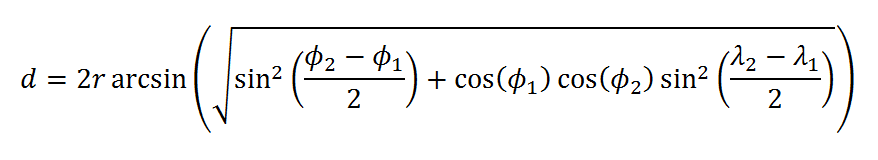

In [35]:
from IPython.display import Image
Image("haversine.png")

In [36]:
#–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–∫–Ω—Ü–∏—é –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ –∫—Ä–∞—Ç—á–∞–π—à–µ–≥–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è. 
#–í—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ: —à–∏—Ä–æ—Ç–∞ –∏ –¥–æ–ª–≥–æ—Ç–∞ –Ω–∞—á–∞–ª–∞ –∏ –∫–æ–Ω—Ü–∞ –ø–æ–µ–∑–¥–∫–∏.  

def haversine_func(lat_start, lng_start, lat_finish, lng_finish):
    
    #–ø–µ—Ä–µ–≤–µ–¥–µ–º –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –≤ —Ä–∞–¥–∏–∞–Ω—ã (–ø–æ–¥—Ä–∞–∑—É–º–µ–≤–∞–µ—Ç —Ñ–æ—Ä–º—É–ª–∞)
    lat_start, lng_start, lat_finish, lng_finish = map(np.radians, (lat_start, lng_start, lat_finish, lng_finish))
    
    #–ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è —Å—Ä–µ–¥–Ω–∏–π —Ä–∞–¥–∏—É—Å –∑–µ–º–ª–∏, –≤—ã—Ä–∞–∂–µ–Ω–Ω—ã–π –≤ –∫–º
    radius_earth = 6371  
    lat = lat_finish - lat_start
    lng = lng_finish - lng_start
    a = np.sin(lat * 0.5) ** 2 + np.cos(lat_start) * np.cos(lat_finish) * np.sin(lng * 0.5) ** 2
    d = 2 * radius_earth * np.arcsin(np.sqrt(a))
    return d

**–ó–∞–ø–∏—à–µ–º –∫—Ä–∞—Ç—á–∞–π—à–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –≤ –∫–æ–ª–æ–Ω–∫—É haversine**

In [37]:
train['haversine'] = haversine_func(train['pickup_latitude'].values, train['pickup_longitude'].values,
                                    train['dropoff_latitude'].values, train['dropoff_longitude'].values)
train.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  log_trip_duration  haversine  
0                  N            455           6.122493   1.498521  
1                  N            663           6.498282   1.805507  
2                  N           2124           7.661527   6.385098  
3                  N            429           6.063785   1.485498  
4                  N            435           6.077642   1.188588

–ó–∞–ø–∏—à–∏–º –ª–æ–≥–∞—Ä–∏—Ñ–º `haversine` –≤ –æ—Ç–¥–µ–ª—å–Ω—É—é –∫–æ–ª–æ–Ω–∫—É:

In [38]:
train['log_haversine'] = np.log1p(train['haversine'])
train.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  log_trip_duration  haversine  \
0                  N            455           6.122493   1.498521   
1                  N            663           6.498282   1.805507   
2                  N           2124           7.661527   6.385098   
3                  N            429           6.063785   1.485498   
4                  N            435           6.077642   1.188588   

   log_haversine  
0       0.915699  
1       1.031584  
2       1.999464  
3       0.910473  
4       0.783257

–£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –ª–æ–≥–∞—Ä–∏—Ñ–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –ª—É—á—à–µ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å –Ω–∞—à–∏–º —Ç–∞—Ä–≥–µ—Ç–æ–º, —á–µ–º –ø—Ä–æ—Å—Ç–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ:

In [39]:
correlation = train[['log_trip_duration', 'haversine', 'log_haversine']].corr()
correlation

log_trip_duration  haversine  log_haversine
log_trip_duration           1.000000   0.573595       0.749882
haversine                   0.573595   1.000000       0.844501
log_haversine               0.749882   0.844501       1.000000

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å—Ä–µ–¥–Ω—é—é —Å–∫–æ—Ä–æ—Å—Ç—å –¥–≤–∏–∂–µ–Ω–∏—è —Ç–∞–∫—Å–∏**

–í–ê–ñ–ù–û: **trip_duration** - duration of the trip in seconds

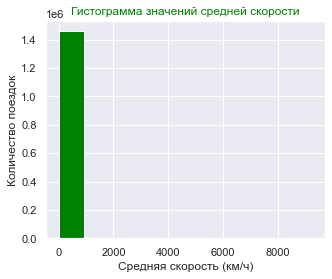

In [40]:
train['avrg_speed'] = train['haversine'] / train['trip_duration'] * 3600

plt.rcParams['figure.figsize'] = [5, 4]

plt.hist(train['avrg_speed'].values, bins=10, color = 'green')
plt.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –∑–Ω–∞—á–µ–Ω–∏–π —Å—Ä–µ–¥–Ω–µ–π —Å–∫–æ—Ä–æ—Å—Ç–∏', color = 'green')
plt.xlabel('C—Ä–µ–¥–Ω—è—è —Å–∫–æ—Ä–æ—Å—Ç—å (–∫–º/—á)')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫')
plt.show()

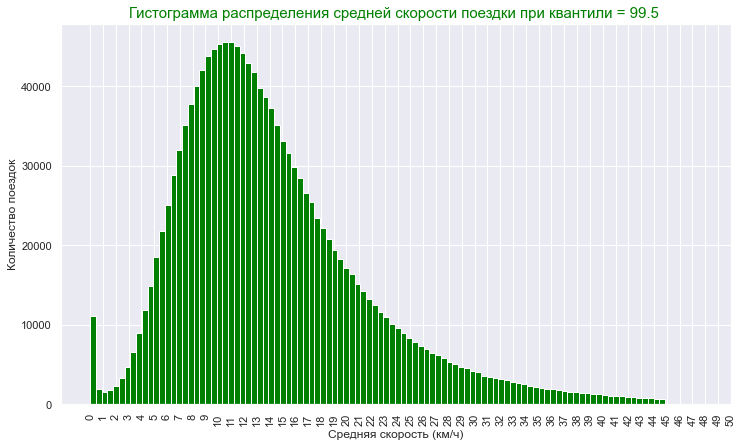

In [41]:
plt.rcParams['figure.figsize'] = [12, 7]

plt.hist(train[train['avrg_speed'] < train['avrg_speed'].quantile(0.995)]['avrg_speed'].values, bins=100, color = 'green')

plt.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–π —Å–∫–æ—Ä–æ—Å—Ç–∏ –ø–æ–µ–∑–¥–∫–∏ –ø—Ä–∏ –∫–≤–∞–Ω—Ç–∏–ª–∏ = 99.5 ', color='green', fontsize=15)
plt.xticks(range(51), rotation='vertical')
plt.xlabel('C—Ä–µ–¥–Ω—è—è —Å–∫–æ—Ä–æ—Å—Ç—å (–∫–º/—á)')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫')
plt.show()

–î–ª—è –∫–∞–∂–¥–æ–π –ø–∞—Ä—ã (–¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏, —á–∞—Å —Å—É—Ç–æ–∫) –ø–æ—Å—á–∏—Ç–∞–µ–º –º–µ–¥–∏–∞–Ω—É —Å–∫–æ—Ä–æ—Å—Ç–µ–π

Text(0.5, 1.0, '–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è —Å–∫–æ—Ä–æ—Å—Ç–∏ –æ—Ç –¥–Ω—è –Ω–µ–¥–µ–ª–∏ –∏ —á–∞—Å–∞ –≤ —Å—É—Ç–∫–∞—Ö')

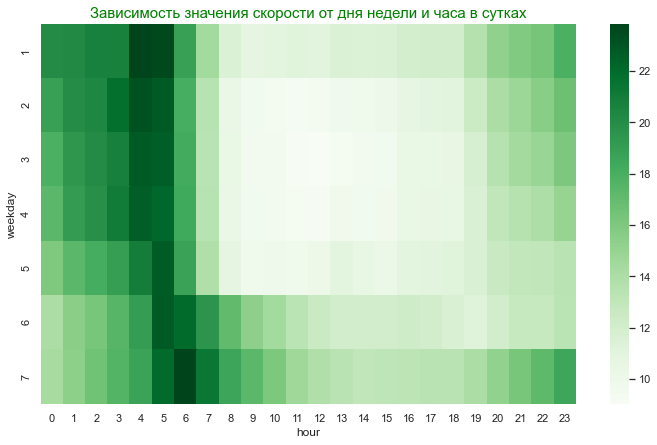

In [42]:
weekd_hour_avrspeed = pd.DataFrame(train.groupby([train['pickup_datetime'].dt.weekday,
                                                  train['pickup_datetime'].dt.hour])['avrg_speed'].median())

weekd_hour_avrspeed.index.rename(['weekday', 'hour'], inplace=True) 
weekd_hour_avrspeed.reset_index(inplace=True)

weekd_hour_avrspeed['weekday'] += 1
htmp = weekd_hour_avrspeed.pivot(index='weekday', columns='hour', values='avrg_speed')

sns.heatmap(htmp,cmap="Greens")
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è —Å–∫–æ—Ä–æ—Å—Ç–∏ –æ—Ç –¥–Ω—è –Ω–µ–¥–µ–ª–∏ –∏ —á–∞—Å–∞ –≤ —Å—É—Ç–∫–∞—Ö', color = 'green', fontsize=15)

**–£–¥–∞–ª–∏–º –∫–æ–ª–æ–Ω–∫—É —Å–æ –∑–Ω–∞—á–µ–Ω–∏–µ–º —Å—Ä–µ–¥–Ω–µ–π —Å–∫–æ—Ä–æ—Å—Ç–∏:**

In [43]:
train.drop(['avrg_speed'], axis=1, inplace=True)

**<span style="color:green">–ü—Ä–æ –Ω–∏–∑–∫—É—é —Å—Ä–µ–¥–Ω—é—é —Å–∫–æ—Ä–æ—Å—Ç—å:</span>** 

<span style="color:green">–ü–µ—Ä–≤–æ–µ, —á—Ç–æ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, –ø–æ –±—É–¥–Ω—è–º (—Å –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫–∞ –ø–æ –ø—è—Ç–Ω–∏—Ü—É) —Å 7 —É—Ç—Ä–∞ –¥–æ 19 –≤–µ—á–µ—Ä–∞ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Å–∞–º–∞—è –Ω–∏–∑–∫–∞—è —Å—Ä–µ–¥–Ω—è—è —Å–∫–æ—Ä–æ—Å—Ç—å. –û—á–µ–≤–∏–¥–Ω–æ, —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –ª—é–¥–∏ –µ–¥—É—Ç –Ω–∞ —Ä–∞–±–æ—Ç—É –∏ –ø–æ –¥–µ–ª–∞–º, –¥–æ—Ä–æ–≥–∏ –∑–∞–≥—Ä—É–∂–µ–Ω—ã. </span>

<span style="color:green">–í —Å—É–±–±–æ—Ç—É, —Å–∞–º–∞—è –Ω–∏–∑–∫–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Å 12 –¥–Ω—è –¥–æ 23 –≤–µ—á–µ—Ä–∞, –Ω–∞–≤–µ—Ä–Ω–æ–µ, –ª—é–¥–∏ –ø–æ–∑–∂–µ –ø—Ä–æ—Å—ã–ø–∞—é—Ç—Å—è –∏ –µ–¥—É—Ç –≤ –º–∞–≥–∞–∑–∏–Ω—ã –∏–ª–∏ –Ω–∞ –¥–∞—á—É –≤ —ç—Ç–æ –≤—Ä–µ–º—è. </span>

<span style="color:green">–í–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ –≤—ã–¥–µ–ª—è–µ—Ç—Å—è, –ø–æ—Ç–æ–º—É —á—Ç–æ –≤ —ç—Ç–æ—Ç –¥–µ–Ω—å —Å–∫–æ—Ä–æ—Å—Ç—å –≤—ã—à–µ, —á–µ–º –≤ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –¥–Ω–∏. –ö—É—Å–æ—á–µ–∫ —Å 13 –¥–æ 19 - —Å—Ä–µ–¥–Ω—è—è —Å–∫–æ—Ä–æ—Å—Ç—å –Ω–∏–∂–µ.</span>

**<span style="color:green">–ü—Ä–æ –≤—ã—Å–æ–∫—É—é —Å—Ä–µ–¥–Ω—é—é —Å–∫–æ—Ä–æ—Å—Ç—å:</span>**

<span style="color:green">–í –±—É–¥–Ω–∏–µ –¥–Ω–∏ —Å—Ä–µ–¥–Ω—è—è —Å–∫–æ—Ä–æ—Å—Ç—å –≤—ã—à–µ –≤ –Ω–æ—á–Ω–æ–µ –≤—Ä–µ–º—è (–¥–æ 6 —É—Ç—Ä–∞), –ø—Ä–∏ —á–µ–º —Å–∞–º–∞—è –≤—ã—Å–∫–æ–∞—è —Å—Ä–µ–¥–Ω—è—è —Å–∫–æ—Ä–æ—Å—Ç—å –≥–¥–µ-—Ç–æ –≤ 4-5 —É—Ç—Ä–∞. –õ—é–¥–∏ —Å–ø—è—Ç, –¥–æ—Ä–æ–≥–∏ —Å–≤–æ–±–æ–¥–Ω—ã–µ. </span>

<span style="color:green">–ü–æ –≤—ã—Ö–æ–¥–Ω—ã–º —ç—Ç–æ –ø–µ—Ä–∏–æ–¥ —Å 4 –¥–æ 8 —É—Ç—Ä–∞. –ü–æ –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–º –ø—Ä–∏—á–∏–Ω–∞–º.</span>

<span style="color:green">–ï—Å–ª–∏ –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –¥–≤–∏–∂–µ–Ω–∏–µ –≤ –≤–µ—á–µ—Ä–Ω–µ–µ –≤—Ä–µ–º—è, —Ç–æ –∑–∞–º–µ—Ç–Ω–æ, —á—Ç–æ 23 —á–∞—Å–∞ –≤ –≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ –∏ –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫ –≤—ã–¥–µ–ª—è—é—Ç—Å—è –æ—Ç 23 —á–∞—Å–æ–≤ –≤ –¥—Ä—É–≥–∏–µ –¥–Ω–∏ –Ω–µ–¥–µ–ª–∏. –ò–º–µ–Ω–Ω–æ –≤ —ç—Ç–∏ –¥–≤–∞ –¥–Ω—è –≤ 23 —á–∞—Å–∞ —Å—Ä–µ–¥–Ω—è—è —Å–∫–æ—Ä–æ—Å—Ç—å –≤—ã—à–µ. –í –≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ —ç—Ç–æ –º–æ–∂–Ω–æ –æ–±—ä—è—Å–Ω–∏—Ç—å —Ç–µ–º, —á—Ç–æ –ª—é–¥–∏ –ø–æ—Ä–∞–Ω—å—à–µ —Ö–æ—Ç—è—Ç –≤–µ—Ä–Ω—É—Ç—å—Å—è –¥–æ–º–æ–π, —á—Ç–æ–±—ã –ø—Ä–∏–≥–æ—Ç–æ–≤–∏—Ç—å—Å—è –∫ —Ä–∞–±–æ—á–µ–π –Ω–µ–¥–µ–ª–µ. –ê –≤–æ—Ç –≤ –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫ –≤–æ–ø—Ä–æ—Å... –í–æ–∑–º–æ–∂–Ω–æ —É—Å—Ç–∞–ª–∏ –æ—Ç –ø–µ—Ä–≤–æ–≥–æ —Ä–∞–±–æ—á–µ–≥–æ –¥–Ω—è –∏ –Ω–µ —Ö–æ—Ç—è—Ç –Ω–∏–∫—É–¥–∞ —É–µ–∑–∂–∞—Ç—å –Ω–æ—á—å—é...</span>

**–û—á–µ–Ω—å –≤–∞–∂–Ω–æ —É—á–∏—Ç—ã–≤–∞—Ç—å –∑–∞–≥—Ä—É–∂–µ–Ω–Ω–æ—Å—Ç—å –Ω–∞ –¥–æ—Ä–æ–≥–∞—Ö –≤–æ –≤—Ä–µ–º—è –ø–æ–µ–∑–¥–∫–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –µ—Å–ª–∏ —Ä–µ—á—å –∏–¥–µ—Ç –æ –∫—Ä—É–ø–Ω—ã—Ö –º–µ–≥–∞–ø–æ–ª–∏—Å–∞—Ö**

–°–æ–∑–¥–∞–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏ "–ø–æ–µ–∑–¥–∫–∞ —Å–æ–≤–µ—Ä—à–∞–µ—Ç—Å—è –≤ –ø–µ—Ä–∏–æ–¥ –ø—Ä–æ–±–æ–∫" –∏ "–ø–æ–µ–∑–¥–∫–∞ —Å–æ–≤–µ—Ä—à–∞–µ—Ç—Å—è –≤ –ø–µ—Ä–∏–æ–¥ —Å–≤–æ–±–æ–¥–Ω—ã—Ö –¥–æ—Ä–æ–≥" (–æ–Ω–∏ –Ω–µ –±—É–¥—É—Ç –∑–∞–≤–∏—Å–µ—Ç—å –æ—Ç —Å–∫–æ—Ä–æ—Å—Ç–∏)

In [44]:
#–ó–∞–≥—Ä—É–∂–µ–Ω–Ω—ã–µ –¥–æ—Ä–æ–≥–∏ –ø–æ –±—É–¥–Ω—è–º (–ø–Ω=0,...,–ø—Ç=4)
weekdays_traffic_jam = (train['pickup_datetime'].dt.weekday <= 4) & \
                       (train['pickup_datetime'].dt.hour >= 7) & \
                       (train['pickup_datetime'].dt.hour <= 19)

#–ü—Ä–æ–±–∫–∏ –≤ —Å—É–±–±–æ—Ç—É (—Å–±=5)
sat_traffic_jam = (train['pickup_datetime'].dt.weekday == 5) & \
                  (train['pickup_datetime'].dt.hour >= 12) & \
                  (train['pickup_datetime'].dt.hour <= 23) 

#–ü—Ä–æ–±–∫–∏ –≤ –≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ (–≤—Å=6)    
sun_traffic_jam = (train['pickup_datetime'].dt.weekday == 6) & \
                  (train['pickup_datetime'].dt.hour >= 13) & \
                  (train['pickup_datetime'].dt.hour <= 19) 

#–ü—Ä–∏–∑–Ω–∞–∫ - "–ø–æ–µ–∑–¥–∫–∞ —Å–æ–≤–µ—Ä—à–∞–µ—Ç—Å—è –≤ –ø–µ—Ä–∏–æ–¥ –ø—Ä–æ–±–æ–∫"
train['is_jam'] = (weekdays_traffic_jam | sat_traffic_jam | sun_traffic_jam).apply(lambda x: 1 if x else 0)


#–°–≤–æ–±–æ–¥–Ω—ã–µ –¥–æ—Ä–æ–≥–∏ –ø–æ –±—É–¥–Ω—è–º
weekdays_traffic_free = (train['pickup_datetime'].dt.weekday <= 4) & \
                  (train['pickup_datetime'].dt.hour <= 6)

#–°–≤–æ–±–æ–¥–Ω—ã–µ –¥–æ—Ä–æ–≥–∏ –≤ –≤—ã—Ö–æ–¥–Ω—ã–µ
weekends_traffic_free = (train['pickup_datetime'].dt.weekday >= 5) & \
                        (train['pickup_datetime'].dt.hour >= 4) & \
                        (train['pickup_datetime'].dt.hour <= 8)

#—Ç–µ —Å–∞–º—ã–µ 23 —á–∞—Å–∞ –≤ –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫ (–ø–Ω=0) –∏ –≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ (–≤—Å=6)
mon_sun_free = ((train['pickup_datetime'].dt.weekday == 0) | (train['pickup_datetime'].dt.weekday == 6)) & \
               ((train['pickup_datetime'].dt.hour == 23))

#–ü—Ä–∏–∑–Ω–∞–∫ - "–ø–æ–µ–∑–¥–∫–∞ —Å–æ–≤–µ—Ä—à–∞–µ—Ç—Å—è –≤ –ø–µ—Ä–∏–æ–¥ —Å–≤–æ–±–æ–¥–Ω—ã—Ö –¥–æ—Ä–æ–≥"
train['is_free'] = (weekdays_traffic_free | weekends_traffic_free | mon_sun_free).apply(lambda x: 1 if x else 0)

In [45]:
train.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  log_trip_duration  haversine  \
0                  N            455           6.122493   1.498521   
1                  N            663           6.498282   1.805507   
2                  N           2124           7.661527   6.385098   
3                  N            429           6.063785   1.485498   
4                  N            435           6.077642   1.188588   

   log_haversine  is_jam  is_free  
0       0.915699       1        0  
1       1.031584       0        0  
2       1.999464       1        0  
3       0.910473       1        0  
4       0.783257       1        0

<span style="color:green">–ú—ã –≤—ã–¥–µ–ª–∏–ª–∏ –¥–≤–µ —Ç–æ—á–∫–∏ - –¥–≤–∞ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ —ç—Ç–æ John F. Kennedy International Airport –∏ LaGuardia Airport.</span>

In [46]:
#–¢–µ—Ä–º–∏–Ω–∞–ª –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –ö–µ–Ω–Ω–µ–¥–∏ 40.666056,-73.812310  
#–ö–æ–Ω–µ—Ü —Ç–µ—Ä–º–∏–Ω–∞–ª–∞ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ 40.644558, -73.777260
train['pickup_kennedy'] = ((train['pickup_latitude'] <= 40.666056) \
                        & (train['pickup_latitude'] >= 40.644558) \
                        & (train['pickup_longitude'] >= -73.812310) \
                        & (train['pickup_longitude'] <= -73.777260)).apply(lambda x: 1 if x else 0)

train['dropoff_kennedy'] = ((train['dropoff_latitude'] <= 40.666056) \
                         & (train['dropoff_latitude'] >= 40.644558) \
                         & (train['dropoff_longitude'] >= -73.812310) \
                         & (train['dropoff_longitude'] <= -73.777260)).apply(lambda x: 1 if x else 0)


#–¢–µ—Ä–º–∏–Ω–∞–ª –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –õ–∞–ì—É—Ä–¥–∏—è 40.776941,-73.873965
#–¢–µ—Ä–º–∏–Ω–∞–ª –ø—Ä–∏–±—ã—Ç–∏—è –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –õ–∞–ì—É—Ä–¥–∏—è 40.772754,-73.871829
train['pickup_laguardia'] = ((train['pickup_latitude'] <= 40.776941) \
                          & (train['pickup_latitude'] >= 40.772754) \
                          & (train['pickup_longitude'] >= -73.873965) \
                          & (train['pickup_longitude'] <= -73.871829)).apply(lambda x: 1 if x else 0)

train['dropoff_laguardia'] = ((train['dropoff_latitude'] <= 40.776941) \
                           & (train['dropoff_latitude'] >= 40.772754) \
                           & (train['dropoff_longitude'] >= -73.873965) \
                           & (train['dropoff_longitude'] <= -73.871829)).apply(lambda x: 1 if x else 0)

Text(0.5, 1.0, '–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–µ–∑–¥–∫–∏ –∏ –∑–∞–≥—Ä—É–∂–µ–Ω–Ω—ã—Ö –¥–æ—Ä–æ–≥')

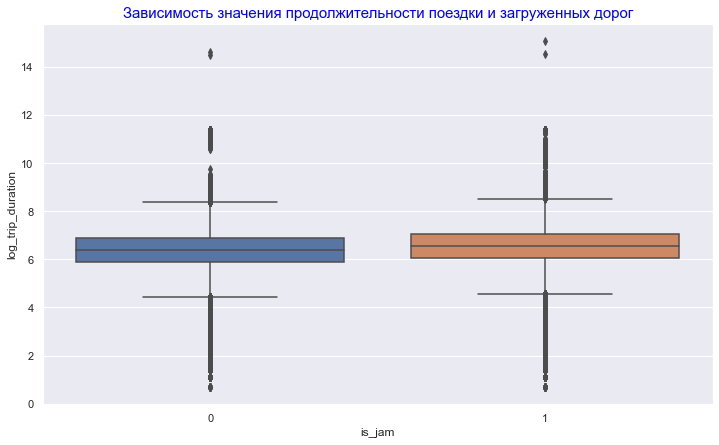

In [47]:
sns.boxplot(x = 'is_jam', y = 'log_trip_duration', data = train)
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–µ–∑–¥–∫–∏ –∏ –∑–∞–≥—Ä—É–∂–µ–Ω–Ω—ã—Ö –¥–æ—Ä–æ–≥', color = 'blue', fontsize=15)

Text(0.5, 1.0, '–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–µ–∑–¥–∫–∏ –∏ —Å–≤–æ–±–æ–¥–Ω—ã—Ö –¥–æ—Ä–æ–≥')

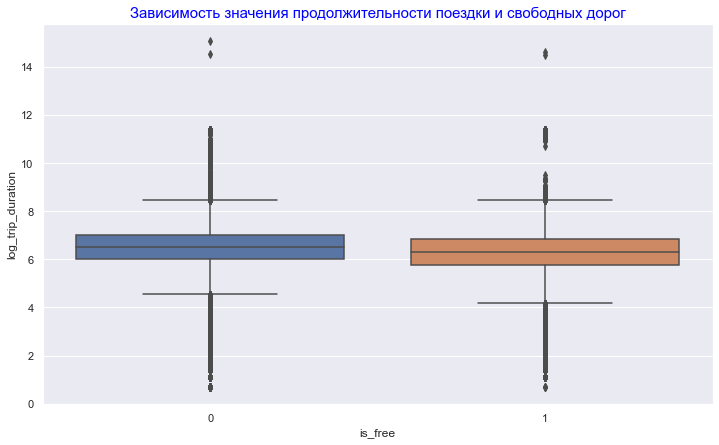

In [48]:
sns.boxplot(x = "is_free", y = "log_trip_duration", data = train)
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–µ–∑–¥–∫–∏ –∏ —Å–≤–æ–±–æ–¥–Ω—ã—Ö –¥–æ—Ä–æ–≥', color = 'blue', fontsize=15)

Text(0.5, 1.0, '–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–µ–∑–¥–∫–∏ –∏ –ø–æ–µ–∑–¥–∫–∏ –≤ –∏–ª–∏ –∏–∑ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –ö–µ–Ω–Ω–µ–¥–∏')

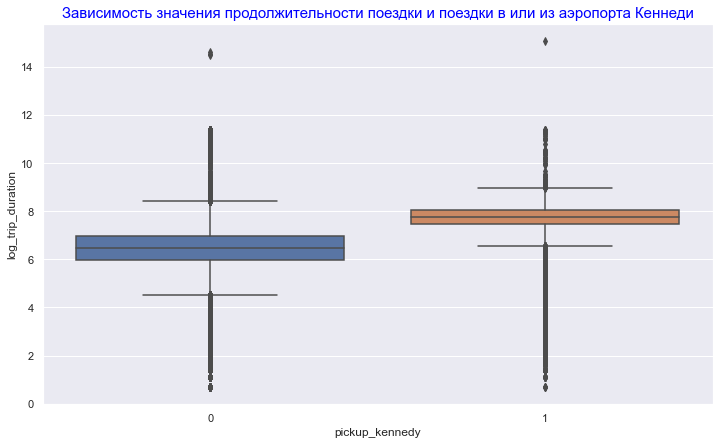

In [49]:
sns.boxplot(x = "pickup_kennedy", y = "log_trip_duration", data = train)
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–µ–∑–¥–∫–∏ –∏ –ø–æ–µ–∑–¥–∫–∏ –≤ –∏–ª–∏ –∏–∑ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –ö–µ–Ω–Ω–µ–¥–∏', color = 'blue', fontsize=15)

Text(0.5, 1.0, '–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–µ–∑–¥–∫–∏ –∏ –ø–æ–µ–∑–¥–∫–∏ –≤ –∏–ª–∏ –∏–∑ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –õ–∞–ì—É–∞—Ä–¥–∏—è')

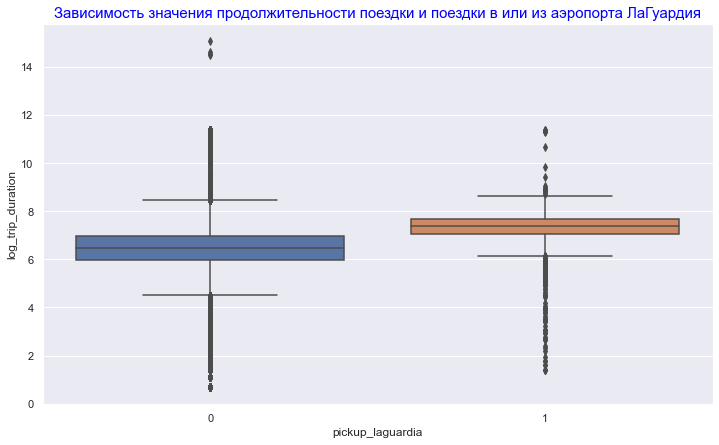

In [50]:
sns.boxplot(x = "pickup_laguardia", y = "log_trip_duration", data = train)
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–µ–∑–¥–∫–∏ –∏ –ø–æ–µ–∑–¥–∫–∏ –≤ –∏–ª–∏ –∏–∑ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –õ–∞–ì—É–∞—Ä–¥–∏—è', color = 'blue', fontsize=15)

**<span style="color:green">–ú–æ–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ "–ø–æ–µ–∑–¥–∫–∞ —Å–æ–≤–µ—Ä—à–∞–µ—Ç—Å—è –≤ –ø–µ—Ä–∏–æ–¥ –ø—Ä–æ–±–æ–∫" –∏ "–ø–æ–µ–∑–¥–∫–∞ —Å–æ–≤–µ—Ä—à–∞–µ—Ç—Å—è –≤ –ø–µ—Ä–∏–æ–¥ —Å–≤–æ–±–æ–¥–Ω—ã—Ö –¥–æ—Ä–æ–≥" –ø–æ–ª—É—á–∏–ª–∏—Å—å –ø—Ä–∞–≤–∏–ª—å–Ω—ã–º–∏, –æ–¥–Ω–∞–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–∏, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –¥–≤—É–º—è –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞–º–∏ –ø–æ–ª—É—á–∏–ª–∏—Å—å –±–æ–ª–µ–µ —Å–∏–ª—å–Ω—ã–º–∏.</span>**

–û–±—É—á–∏–º `Ridge`-—Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –≤—ã–¥–µ–ª–∏–ª–∏ –∫ —Ç–µ–∫—É—â–µ–º—É –º–æ–º–µ–Ω—Ç—É. 

**–°–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–∏–ø—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:**

<span style="color:green">–†–∞–∑–±–µ—Ä–µ–º—Å—è, –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º: –Ω–∞ –º–æ–π –≤–∑–≥–ª—è–¥, —Å–µ–∫—Ç–æ—Ä –≥–¥–µ –Ω–∞—á–∞–ª–∞—Å—å –∏ –∑–∞–∫–æ–Ω—á–∏–ª–∞—Å—å –ø–æ–µ–∑–¥–∫–∞ –±—ã–ª–æ –±—ã —Ä–∞–∑—É–º–Ω–æ —Å–¥–µ–ª–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏, —Ç–∞–∫ –∫–∞–∫ –Ω–µ—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –°–æ–æ—Ç–≤–µ—Å—Ç–≤–µ–Ω–Ω–æ, –∫–∞–∫ –≤ –ø—Ä–µ–¥—ã–¥—É—â–µ–º –∑–∞–¥–∞–Ω–∏–∏ –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –∏ —á–∞—Å—ã –≤ —Å—É—Ç–∫–∞—Ö —Ç–æ–∂–µ –±—É–¥—É—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏. </span>

<span style="color:green">–ß–∏—Å–ª–µ–Ω–Ω—ã–µ: –¥–µ–Ω—å –≤ –≥–æ–¥—É, –º–µ—Å—è—Ü –∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ. –í—ã—è—Å–Ω–∏–ª–∏, —á—Ç–æ —É —ç—Ç–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–∏—Å—É—Ç–≤—É–µ—Ç. </span>

<span style="color:green">–û—Å—Ç–∞–≤—à–∏–µ—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∏ –º—ã –ø—Ä–æ—Å—Ç–æ –¥–æ–±–∞–≤–∏–º. </span>

In [56]:
category = ['weekday', 'hour', 'pickup_sector', 'dropoff_sector']
numer = ['log_haversine', 'day_of_year', 'month']
other = ['is_jam', 'is_free', 'pickup_kennedy', 'dropoff_kennedy',
         'pickup_laguardia', 'dropoff_laguardia', 'is_snowstorm','is_snowstorm']

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
#—Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º –µ–¥–∏–Ω–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ –∫–æ–¥–∏—Ä—É—é—â–∏—Ö —Ñ—É–Ω–∫—Ü–∏–π —Å –ø–æ–º–æ—â—å—é ColumnTransformer
date_tr = ColumnTransformer([
                     ('ohe', OneHotEncoder(handle_unknown="ignore"), category),
                     ('scaler', StandardScaler(), numer),
                     ('add',  'passthrough', other)
                     ])

#—Å–æ–∑–¥–∞–¥–∏–º –ø–∞–π–ø–ª–∞–π–Ω —Å Ridge —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –∏ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–º –¥–∞–Ω–Ω—ã—Ö 
pipeline = Pipeline(steps=[
                   ('ohe_and_st_scaler', date_tr),
                   ('regression', Ridge())
                   ])

–ü–µ—Ä–µ—Ö–æ–¥–∏–º –∫ –æ–±—É—á–µ–Ω–∏—é

In [59]:
#—Ä–∞–∑–æ–±—å–µ–º X2 –Ω–∞ —Ç—Ä–µ–π–Ω –∏ —Ç–µ—Å—Ç –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ 7:3
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, train['log_trip_duration'], test_size=0.3, random_state=1)

In [60]:
model = pipeline.fit(X2_train, y2_train)
y_pred = model.predict(X2_test)
print("Test RMSE = ", mean_squared_error(y2_test, y_pred, squared=False))

Test RMSE =  0.489195161495137


**–ö–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –∑–∞–º–µ—Ç–Ω–æ –≤–æ–∑—Ä–æ—Å–ª–æ)**

### –ü–æ—Ä–∞–±–æ—Ç–∞–µ–º –Ω–∞–¥ —É–ª—É—á—à–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–∏

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∞–Ω–æ–º–∞–ª–∏–∏ –≤–æ –≤—Ä–µ–º–µ–Ω–∞—Ö –ø–æ–µ–∑–¥–∫–∏:**

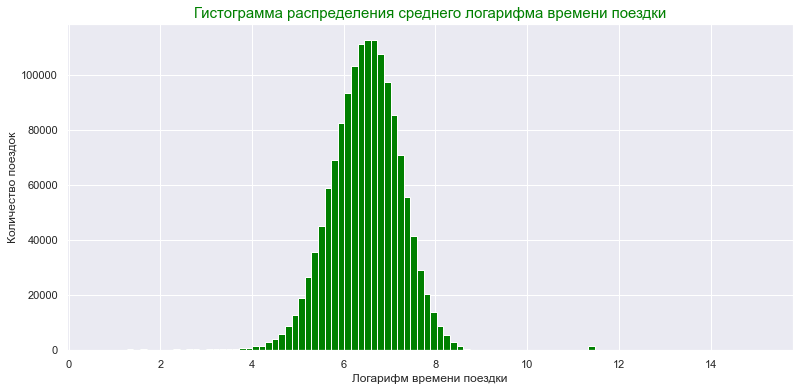

In [72]:
plt.rcParams['figure.figsize'] = [13,6]
plt.hist(train.log_trip_duration.values, bins=100, color = 'green')
plt.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–∫–∏', color = 'green', fontsize = 15)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫')
plt.xlabel('–õ–æ–≥–∞—Ä–∏—Ñ–º –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–µ–∑–¥–∫–∏')
plt.show()

**–í—ã–≤–æ–¥:** –ø–æ–µ–∑–¥–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –¥–ª–∏–ª–∏—Å—å –º–µ–Ω—å—à–µ –º–∏–Ω—É—Ç—ã –Ω—É–∂–Ω–æ –æ—Ç–±—Ä–æ—Å–∏—Ç—å, —Ç–∞–∫ –∫–∞–∫ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —ç—Ç–æ –æ—à–∏–±–æ—á–Ω—ã–µ –ø–æ–µ–∑–¥–∫–∏, —Ç–∞–∫ –∫–∞–∫ –≤—Ä–µ–º—è –≤ –ø—É—Ç–∏ —Å—É–ø–µ—Ä –º–∞–ª–µ–Ω—å–∫–æ–µ. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, —Å—Ä–µ–¥–Ω–∏–π –ª–æ–≥–∞—Ä–∏—Ñ–º —Ç–∞–∫–∏—Ö –ø–æ–µ–∑–¥–æ–∫ –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –º–µ–Ω—å—à–µ —á–µ—Ç—ã—Ä–µ—Ö. 

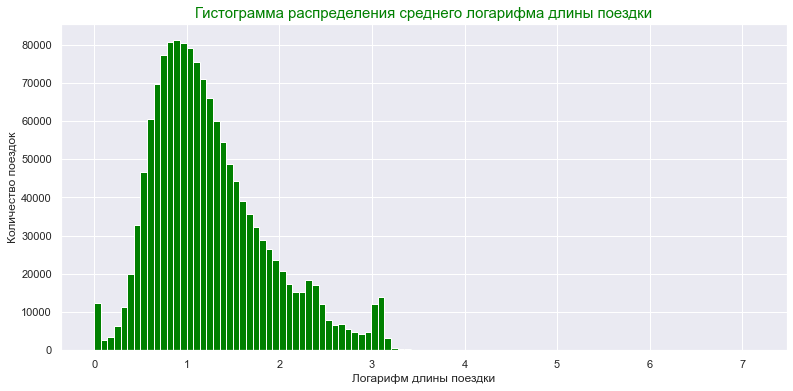

In [73]:
plt.hist(train.log_haversine.values, bins=100, color = 'green')
plt.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –¥–ª–∏–Ω—ã –ø–æ–µ–∑–¥–∫–∏', color = 'green', fontsize = 15)
plt.xlabel('–õ–æ–≥–∞—Ä–∏—Ñ–º –¥–ª–∏–Ω—ã –ø–æ–µ–∑–¥–∫–∏')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫')
plt.show()

**–í—ã–≤–æ–¥:** –±—É–¥–µ–º –≥–æ–≤–æ—Ä–∏—Ç—å, –ø—Ä–æ –±–æ–ª—å—à–∏–µ –ø—Ä–æ–π–¥–µ–Ω–Ω—ã–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è. –î–∞–≤–∞–π—Ç–µ —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –µ—Å–ª–∏ –ø—Ä–æ–π–¥–µ–Ω–æ –±–æ–ª—å—à–µ 40 –∫–º, —Ç–æ —ç—Ç–æ –≤—ã–±—Ä–æ—Å –∏ –µ–≥–æ –Ω—É–∂–Ω–æ —á–∏—Å—Ç–∏—Ç—å. (3,6 —Ä–∞–≤–µ–Ω —Å—Ä–µ–¥–Ω–∏–π –ª–æ–≥–∞—Ä–∏—Ñ–º –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ)

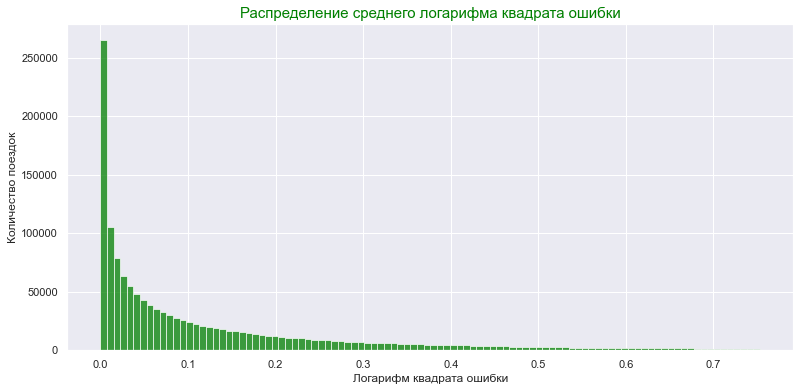

In [76]:
#–ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ—Å—Ç–∞—Ç–∫–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
reg_res = (train['log_trip_duration'] - pipeline.predict(X2)) ** 2

#–æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ - –∫–≤–∞–Ω—Ç–∏–ª—å 95%
sns.histplot(reg_res[reg_res < reg_res.quantile(0.95)], bins=100, color = 'green')

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–∞ –æ—à–∏–±–∫–∏', color = 'green', fontsize = 15)
plt.xlabel('–õ–æ–≥–∞—Ä–∏—Ñ–º –∫–≤–∞–¥—Ä–∞—Ç–∞ –æ—à–∏–±–∫–∏')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫')
plt.show()

**–ß–∏—Å—Ç–∏–º –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤:**

In [77]:
X2_new = X2[(train['log_trip_duration'] > 4) & (train['log_haversine'] < 3.6) & (reg_res < reg_res.quantile(0.95))]

y2_new = train[(train['log_trip_duration'] > 4) & (train['log_haversine'] < 3.6) & 
               (reg_res < reg_res.quantile(0.95))]['log_trip_duration']

**–û–±—É—á–∞–µ–º –∏ —Ç–µ—Å—Ç–∏—Ä—É–µ–º:**

In [78]:
model = pipeline.fit(X2_new, y2_new)

y_pred = model.predict(X2_test)

print("Train RMSE = " , mean_squared_error(y2_test, y_pred, squared=False))

C:\Users\krup1\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


Train RMSE =  0.49049867589580753


–ò–∑–º–µ–Ω–µ–Ω–∏—è –≤ –ª—É—á—à—É—é —Å—Ç–æ—Ä–æ–Ω—É, –Ω–æ —Å–æ–≤—Å–µ–º –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ(

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —Å–µ–π—á–∞—Å –≤ –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å –ø—Ä–æ–±–ª–µ–º–∞ - –º–Ω–æ–≥–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ß–∞—Å—Ç–æ —Ç–∞–º –º–æ–≥—É—Ç —Å–æ–¥–µ—Ä–∂–∞—Ç—å—Å—è —Ä–µ–¥–∫–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏, –∏ –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç –ø–µ—Ä–µ–æ–±—É—á–∏—Ç—å—Å—è –Ω–∞ —Ç–∞–∫–∏—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö. –ü–æ—Ä–∞–±–æ—Ç–∞–µ–º –Ω–∞–¥ —ç—Ç–∏–º: –æ–±—ä–µ–¥–∏–Ω–∏–º —Ä–µ–¥–∫–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏.

In [79]:
import scipy

In [80]:
#–¥–∞–Ω–Ω—ã–µ —Å–æ –≤—Å–µ–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏, –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ
data_coded = date_tr.fit_transform(X2_new)

#—Å–æ–∑–¥–∞–µ–º —Å —ç—Ç–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º 
X2_special_cat = pd.DataFrame.sparse.from_spmatrix(data_coded)

#–ø–æ–º–µ–Ω—è–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ 
X2_special_cat.columns = list(date_tr.named_transformers_['ohe'].get_feature_names()) + numer + other

In [81]:
X2_special_cat.head()

x0_0  x0_1  x0_2  x0_3  x0_4  x0_5  x0_6  x1_0  x1_1  x1_2  ...  \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0  ...   
2   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  ...   

   day_of_year     month  is_jam  is_free  pickup_kennedy  dropoff_kennedy  \
0    -0.343189 -0.304769     1.0      0.0             0.0              0.0   
1     1.403378  1.481234     0.0      0.0             0.0              0.0   
2    -1.410536 -1.495438     1.0      0.0             0.0              0.0   
3     0.103156  0.290565     1.0      0.0             0.0              0.0   
4    -0.110314 -0.304769     1.0      0.0             0.0              0.0   

   pickup_laguardia  dropoff_laguardia  is_snowstorm  is_snowstorm  
0               0.0                0.0           0.0           0.0  
1               0.0                0.0           0.0           0.0  
2               0.0                0.0           0.0           0.0  
3               0.0                0.0           0.0           0.0  
4               0.0                0.0           0.0           0.0  

[5 rows x 84 columns]

In [82]:
X2_special_cat.shape

(1385490, 84)

–¢–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–æ, —Å–∫–æ–ª—å–∫–æ –≤ –∫–∞–∂–¥–æ–º –∏–∑ —Å—Ç–æ–ª–±—Ü–æ–≤, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é ohe, –µ–¥–∏–Ω–∏—á–µ–∫. –ü–æ —Å—É—Ç–∏ –º—ã –±—É–¥–µ–º —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞, –∫–∞–∫ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –∫–∞–∂–¥–∞—è –∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–π. 

In [83]:
amount_of_category = []

for col in list(date_tr.named_transformers_['ohe'].get_feature_names()):
    cat = X2_special_cat[X2_special_cat[col]==1].count().values[0]
    
    amount_of_category.append([cat, col])

In [84]:
amount_of_category.sort()
amount_of_category

[[6112, 'x3_1'],
 [6524, 'x3_4'],
 [6861, 'x2_5'],
 [6961, 'x2_11'],
 [7119, 'x2_1'],
 [7323, 'x3_13'],
 [7368, 'x3_2'],
 [7406, 'x3_5'],
 [7608, 'x3_11'],
 [7716, 'x2_4'],
 [7734, 'x3_17'],
 [7934, 'x3_9'],
 [8010, 'x3_18'],
 [8294, 'x2_17'],
 [8311, 'x3_8'],
 [8669, 'x3_19'],
 [8901, 'x3_12'],
 [8976, 'x2_2'],
 [9127, 'x3_10'],
 [9356, 'x3_3'],
 [9370, 'x3_6'],
 [9407, 'x3_7'],
 [9679, 'x2_19'],
 [9811, 'x3_14'],
 [10056, 'x2_8'],
 [10270, 'x3_20'],
 [10333, 'x2_6'],
 [10404, 'x2_13'],
 [10699, 'x2_12'],
 [10775, 'x2_18'],
 [11229, 'x2_10'],
 [11467, 'x3_15'],
 [11482, 'x2_14'],
 [11606, 'x2_3'],
 [11665, 'x2_9'],
 [11705, 'x2_20'],
 [13775, 'x3_16'],
 [14117, 'x2_7'],
 [14459, 'x1_5'],
 [15001, 'x1_4'],
 [15793, 'x2_15'],
 [17957, 'x2_16'],
 [20038, 'x1_3'],
 [26856, 'x1_2'],
 [32232, 'x1_6'],
 [37017, 'x1_1'],
 [51004, 'x1_0'],
 [53066, 'x1_7'],
 [60453, 'x1_16'],
 [61589, 'x1_10'],
 [63630, 'x1_9'],
 [63687, 'x1_8'],
 [64474, 'x1_11'],
 [66865, 'x1_13'],
 [66969, 'x1_23'],
 [67189

–ë—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å –∫–æ–ª–æ–Ω–∫—É —Ä–µ–¥–∫–æ–π, –µ—Å–ª–∏ –≤ –Ω–µ–π –µ–¥–∏–Ω–∏—Ü –º–µ–Ω—å—à–µ 10 000.

In [85]:
rare_—Åol = ['x3_1','x3_4','x2_5','x2_11','x2_1','x3_13','x3_2','x3_5','x3_11','x2_4','x3_17','x3_9','x3_18','x2_17','x3_8',
            'x3_19','x3_12','x2_2','x3_10','x3_3','x3_6','x3_7','x2_19','x3_14']

**–û–±—ä–µ–¥–∏–Ω–∏–º –∫–æ–ª–æ–Ω–∫–∏ —Å —Ä–µ–¥–∫–∏–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏:**

In [86]:
rares_column = pd.DataFrame(np.where((X2_special_cat['x3_1'] == 1) | (X2_special_cat['x3_4'] == 1) | 
                            (X2_special_cat['x2_5'] == 1)  | (X2_special_cat['x2_11'] == 1) |
                            (X2_special_cat['x2_1'] == 1)  | (X2_special_cat['x3_13'] == 1) |
                            (X2_special_cat['x3_2'] == 1)  | (X2_special_cat['x3_5'] == 1) |
                            (X2_special_cat['x3_11'] == 1) | (X2_special_cat['x2_4'] == 1) |
                            (X2_special_cat['x3_17'] == 1) | (X2_special_cat['x3_9'] == 1) |
                            (X2_special_cat['x3_18'] == 1) | (X2_special_cat['x2_17'] == 1)|
                            (X2_special_cat['x3_8'] == 1)  | (X2_special_cat['x3_19'] == 1)|
                            (X2_special_cat['x3_12'] == 1) | (X2_special_cat['x2_2'] == 1)| 
                            (X2_special_cat['x3_10'] == 1) | (X2_special_cat['x3_3'] == 1)| 
                            (X2_special_cat['x3_6'] == 1)  | (X2_special_cat['x3_7'] == 1)|
                            (X2_special_cat['x2_19'] == 1) | (X2_special_cat['x3_14'] == 1),
                            1, 0))

**–ò–∑–±–∞–≤–∏–º—Å—è –æ—Ç –∫–æ–ª–æ–Ω–æ–∫ —Ä–µ–¥–∫–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π:**

In [87]:
X2_special_cat = X2_special_cat.drop(rare_—Åol, axis=1)

**–î–æ–±–∞–≤–∏–º –æ–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã–µ —Ä–µ–¥–∫–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏:**

In [88]:
X2_special_cat['rares_column'] = rares_column

In [89]:
X2_special_cat.columns

Index(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x1_0', 'x1_1',
       'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7', 'x1_8', 'x1_9', 'x1_10',
       'x1_11', 'x1_12', 'x1_13', 'x1_14', 'x1_15', 'x1_16', 'x1_17', 'x1_18',
       'x1_19', 'x1_20', 'x1_21', 'x1_22', 'x1_23', 'x2_-1', 'x2_3', 'x2_6',
       'x2_7', 'x2_8', 'x2_9', 'x2_10', 'x2_12', 'x2_13', 'x2_14', 'x2_15',
       'x2_16', 'x2_18', 'x2_20', 'x3_-1', 'x3_15', 'x3_16', 'x3_20',
       'log_haversine', 'day_of_year', 'month', 'is_jam', 'is_free',
       'pickup_kennedy', 'dropoff_kennedy', 'pickup_laguardia',
       'dropoff_laguardia', 'is_snowstorm', 'is_snowstorm', 'rares_column'],
      dtype='object')

**–û–±—É—á–∞–µ–º –∏ —Ç–µ—Å—Ç–∏—Ä—É–µ–º:**

In [90]:
ridge = Ridge()

X3_train, X3_test, y3_train, y3_test = train_test_split(X2_special_cat, y2_new, test_size=0.3, random_state=10)
ridge.fit(X3_train, y3_train)

y_pred = ridge.predict(X3_test)
print("Train RMSE = ", mean_squared_error(y3_test, y_pred, squared=False))

C:\Users\krup1\anaconda3\lib\site-packages\sklearn\utils\validation.py:509: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\krup1\anaconda3\lib\site-packages\sklearn\utils\validation.py:509: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Train RMSE =  0.35286625531716115


–ó–∞–º–µ—Ç–Ω–æ–µ —É–ª—É—á—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ :-)